In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm


In [6]:
# set the path
path = '/Users/qpasa/Desktop/GC_ids/'
file = 'gcdata_meszaros2019.fits' #merged tables from DR12 and DR14 using APOGEE ID

# read in the merged data table
tb = fits.open(path+file)
# select the data
data = tb[1].data #extracts the numeric bit of the data

# read in the data
fe_h = data.field('FE_H')
mg_fe = data.field('MG_FE')
al_fe = data.field('AL_FE')
k_fe = data.field('K_FE')
ni_fe = data.field('NI_FE')
o_fe = data.field('O_FE')
si_fe = data.field('SI_FE')
v_fe = data.field('V_FE')
c_fe = data.field('C_FE')
s_fe = data.field('S_FE')
n_fe = data.field('N_FE')
mn_fe = data.field('MN_FE')
co_fe = data.field('CO_FE')
p_fe = data.field('P_FE')
ti_fe = data.field('TI_FE')
cu_fe = data.field('CU_FE')
ce_fe = data.field('CE_FE')
ci_fe = data.field('CI_FE')
cr_fe = data.field('CR_FE')
ca_fe = data.field('CA_FE')
na_fe = data.field('NA_FE')
Teff = data.field('TEFF')
logg = data.field('LOGG')
gc_name = data.field('col2')
glat = data.field('GLAT') #galactic latitude (a.k.a |b|)
glon = data.field('GLON') #galactic longitude (a.k.a l)


In [14]:
# finds the best fit function
def fit_func(x,y,n):
	coefs = np.polyfit(x, y, n)   # Fit the data with a 6th degree polynomial
	poly = np.poly1d(coefs)  # Construct the polynomial
	xpoly = np.linspace(np.min(x),np.max(x),100)  # Generate 100 x-coordinates from 0 to max(x)
	ypoly = poly(xpoly)   # Use the polynomial to calculate the y-coordinates
	return xpoly,ypoly,coefs,poly

In [15]:
mask1 = (fe_h>-10)&(si_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
si_fe1 = si_fe[mask1]
gc_name1 = gc_name[mask1]

# get the values of the GCs associated to each subgroup, to then later plot the trend.
# L-E
fehs_le = np.hstack((np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')])))
alphas_le =np.hstack((np.mean(si_fe1[np.where(gc_name1=='NGC6809')]),np.mean(si_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6121')]),np.mean(si_fe1[np.where(gc_name1=='NGC6441')])))

# MAIN-DISC
fehs_md =np.hstack((np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')])))
alphas_md = np.hstack((np.mean(si_fe1[np.where(gc_name1=='NGC104')]),np.mean(si_fe1[np.where(gc_name1=='NGC6397')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6218')]),np.mean(si_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6656')]),np.mean(si_fe1[np.where(gc_name1=='NGC6752')])))
# MAIN-Bulge
fehs_mb =np.hstack((np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
#     np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])))
alphas_mb = np.hstack((np.mean(si_fe1[np.where(gc_name1=='NGC6522')]),np.mean(si_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(si_fe1[np.where(gc_name1=='HP1')]),np.mean(si_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6388')]),np.mean(si_fe1[np.where(gc_name1=='Terzan9')]),\
#      np.mean(si_fe1[np.where(gc_name1=='Terzan4')]),np.mean(si_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(si_fe1[np.where(gc_name1=='NGC6723')]),np.mean(si_fe1[np.where(gc_name1=='NGC6539')]),\
        np.mean(si_fe1[np.where(gc_name1=='NGC6540')]),np.mean(si_fe1[np.where(gc_name1=='NGC6553')])))
# GE
fehs_ge = np.hstack((np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])))
alphas_ge =np.hstack((np.mean(si_fe1[np.where(gc_name1=='NGC362')]),np.mean(si_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC1904')]),np.mean(si_fe1[np.where(gc_name1=='NGC2808')]),\
#      np.mean(si_fe1[np.where(gc_name1=='NGC4147')]),np.mean(si_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6341')]),np.mean(si_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(si_fe1[np.where(gc_name1=='NGC6205')]),np.mean(si_fe1[np.where(gc_name1=='NGC7089')])))
# Helmi
fehs_hel = np.hstack((np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])))
alphas_hel =np.hstack((np.mean(si_fe1[np.where(gc_name1=='NGC5024')]),np.mean(si_fe1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(si_fe1[np.where(gc_name1=='NGC4590')]),np.mean(si_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(si_fe1[np.where(gc_name1=='NGC4590')]),\
       np.mean(si_fe1[np.where(gc_name1=='NGC5272')]),np.mean(si_fe1[np.where(gc_name1=='Pal5')])))

xpoly_le,ypoly_le, coeffs_le,poly_le = fit_func(fehs_le,alphas_le,2)
xpoly_md,ypoly_md, coeffs_md,poly_md = fit_func(fehs_md,alphas_md,2)
xpoly_mb,ypoly_mb, coeffs_mb,poly_mb = fit_func(fehs_mb,alphas_mb,2)
xpoly_ge,ypoly_ge, coeffs_ge,poly_ge = fit_func(fehs_ge,alphas_ge,2)
xpoly_hel,ypoly_hel, coeffs_hel,poly_hel = fit_func(fehs_hel,alphas_hel,2)

LinAlgError: SVD did not converge in Linear Least Squares

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


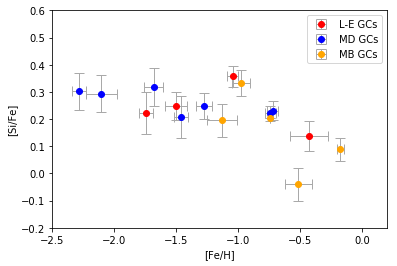

In [7]:
mask1 = (fe_h>-10)&(si_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
si_fe1 = si_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='M55')]),np.mean(fe_h1[np.where(gc_name1=='M10')]),\
     np.mean(fe_h1[np.where(gc_name1=='M4')]),np.mean(fe_h1[np.where(gc_name1=='N6441')])]
#      np.mean(fe_h1[np.where(gc_name1=='N6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
#     np.mean(fe_h1[np.where(gc_name1=='N6712')])]
ys_le = [np.mean(si_fe1[np.where(gc_name1=='M55')]),np.mean(si_fe1[np.where(gc_name1=='M10')]),\
     np.mean(si_fe1[np.where(gc_name1=='M4')]),np.mean(si_fe1[np.where(gc_name1=='N6441')])]
#      np.mean(si_fe1[np.where(gc_name1=='N6544')]),np.mean(si_fe1[np.where(gc_name1=='Pal6')]),\
#      np.mean(si_fe1[np.where(gc_name1=='N6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='M55')]),np.std(fe_h1[np.where(gc_name1=='M10')]),\
     np.std(fe_h1[np.where(gc_name1=='M4')]),np.std(fe_h1[np.where(gc_name1=='N6441')])]
#         np.std(fe_h1[np.where(gc_name1=='N6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
#         np.std(fe_h1[np.where(gc_name1=='N6712')])]
yerrs_le = [np.std(si_fe1[np.where(gc_name1=='M55')]),np.std(si_fe1[np.where(gc_name1=='M10')]),\
     np.std(si_fe1[np.where(gc_name1=='M4')]),np.std(si_fe1[np.where(gc_name1=='N6441')])]
#         np.std(si_fe1[np.where(gc_name1=='N6544')]),np.std(si_fe1[np.where(gc_name1=='Pal6')]),\
#         np.std(si_fe1[np.where(gc_name1=='N6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='N362')]),np.mean(fe_h1[np.where(gc_name1=='N1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='M79')]),np.mean(fe_h1[np.where(gc_name1=='N2808')]),\
#     np.mean(fe_h1[np.where(gc_name1=='N4147')]),np.mean(fe_h1[np.where(gc_name1=='N6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='M92')]),np.mean(fe_h1[np.where(gc_name1=='N288')]),\
    np.mean(fe_h1[np.where(gc_name1=='M13')]),np.mean(fe_h1[np.where(gc_name1=='M2')])]
ys_ge = [np.mean(si_fe1[np.where(gc_name1=='N362')]),np.mean(si_fe1[np.where(gc_name1=='N1851')]),\
     np.mean(si_fe1[np.where(gc_name1=='M79')]),np.mean(si_fe1[np.where(gc_name1=='N2808')]),\
#      np.mean(si_fe1[np.where(gc_name1=='N4147')]),np.mean(si_fe1[np.where(gc_name1=='N288')]),\
     np.mean(si_fe1[np.where(gc_name1=='M92')]),np.mean(si_fe1[np.where(gc_name1=='N6229')]),\
    np.mean(si_fe1[np.where(gc_name1=='M13')]),np.mean(si_fe1[np.where(gc_name1=='M2')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='N362')]),np.std(fe_h1[np.where(gc_name1=='N1851')]),\
     np.std(fe_h1[np.where(gc_name1=='M79')]),np.std(fe_h1[np.where(gc_name1=='N2808')]),\
#         np.std(fe_h1[np.where(gc_name1=='N4147')]),np.std(fe_h1[np.where(gc_name1=='N288')]),\
       np.std(fe_h1[np.where(gc_name1=='M92')]),np.std(fe_h1[np.where(gc_name1=='N6229')]),\
           np.std(fe_h1[np.where(gc_name1=='M13')]),np.std(fe_h1[np.where(gc_name1=='M2')])]
yerrs_ge = [np.std(si_fe1[np.where(gc_name1=='N362')]),np.std(si_fe1[np.where(gc_name1=='N1851')]),\
     np.std(si_fe1[np.where(gc_name1=='M79')]),np.std(si_fe1[np.where(gc_name1=='N2808')]),\
#     np.std(si_fe1[np.where(gc_name1=='N4147')]),np.std(si_fe1[np.where(gc_name1=='N288')]),\
      np.std(si_fe1[np.where(gc_name1=='M92')]),np.std(si_fe1[np.where(gc_name1=='N6229')]),\
           np.std(si_fe1[np.where(gc_name1=='M13')]),np.std(si_fe1[np.where(gc_name1=='M2')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='N5466')]),np.mean(fe_h1[np.where(gc_name1=='N3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='N5139')])]
ys_seq = [np.mean(si_fe1[np.where(gc_name1=='N5466')]),np.mean(si_fe1[np.where(gc_name1=='N3201')]),\
         np.mean(si_fe1[np.where(gc_name1=='N5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='N5466')]),np.std(fe_h1[np.where(gc_name1=='N3201')]),\
            np.std(fe_h1[np.where(gc_name1=='N5139')])]
yerrs_seq = [np.std(si_fe1[np.where(gc_name1=='N5466')]),np.std(si_fe1[np.where(gc_name1=='N3201')]),\
            np.std(si_fe1[np.where(gc_name1=='N5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='47TUC')]),np.mean(fe_h1[np.where(gc_name1=='N6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='M12')]),np.mean(fe_h1[np.where(gc_name1=='M71')]),\
    np.mean(fe_h1[np.where(gc_name1=='M15')]),\
    np.mean(fe_h1[np.where(gc_name1=='M22')]),np.mean(fe_h1[np.where(gc_name1=='N6752')])]
#     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\ np.mean(fe_h1[np.where(gc_name1=='N6352')]),
#         np.mean(fe_h1[np.where(gc_name1=='N6760')]),np.mean(fe_h1[np.where(gc_name1=='trzan12')])]

ys_md = [np.mean(si_fe1[np.where(gc_name1=='47TUC')]),np.mean(si_fe1[np.where(gc_name1=='N6397')]),\
     np.mean(si_fe1[np.where(gc_name1=='M12')]),np.mean(si_fe1[np.where(gc_name1=='M71')]),\
     np.mean(si_fe1[np.where(gc_name1=='M15')]),\
     np.mean(si_fe1[np.where(gc_name1=='M22')]),np.mean(si_fe1[np.where(gc_name1=='N6752')])]
#      np.mean(si_fe1[np.where(gc_name1=='Pal10')]),np.mean(si_fe1[np.where(gc_name1=='IC1276')]),\np.mean(si_fe1[np.where(gc_name1=='N6352')]),
#         np.mean(si_fe1[np.where(gc_name1=='N6760')]),np.mean(si_fe1[np.where(gc_name1=='trzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='47TUC')]),np.std(fe_h1[np.where(gc_name1=='N6397')]),\
     np.std(fe_h1[np.where(gc_name1=='M12')]),np.std(fe_h1[np.where(gc_name1=='M71')]),\
        np.std(fe_h1[np.where(gc_name1=='M15')]),\
        np.std(fe_h1[np.where(gc_name1=='M22')]),np.std(fe_h1[np.where(gc_name1=='N6752')])]
#         np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\np.std(fe_h1[np.where(gc_name1=='N6352')]),
#            np.std(fe_h1[np.where(gc_name1=='N6760')]),np.std(fe_h1[np.where(gc_name1=='trzan12')])]

yerrs_md = [np.std(si_fe1[np.where(gc_name1=='47TUC')]),np.std(si_fe1[np.where(gc_name1=='N6397')]),\
     np.std(si_fe1[np.where(gc_name1=='M12')]),np.std(si_fe1[np.where(gc_name1=='M71')]),\
        np.std(si_fe1[np.where(gc_name1=='M15')]),\
        np.std(si_fe1[np.where(gc_name1=='M22')]),np.std(si_fe1[np.where(gc_name1=='N6752')])]
#         np.std(si_fe1[np.where(gc_name1=='Pal10')]),np.std(si_fe1[np.where(gc_name1=='IC1276')]),\np.std(si_fe1[np.where(gc_name1=='N6352')]),
#            np.std(si_fe1[np.where(gc_name1=='N6760')]),np.std(si_fe1[np.where(gc_name1=='trzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='N6522')]),np.mean(fe_h1[np.where(gc_name1=='M107')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='N6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='N6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
#     np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='N6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='N6723')]),np.mean(fe_h1[np.where(gc_name1=='N6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='N6540')]),np.mean(fe_h1[np.where(gc_name1=='N6553')])]

ys_mb = [np.mean(si_fe1[np.where(gc_name1=='N6522')]),np.mean(si_fe1[np.where(gc_name1=='M107')]),\
     np.mean(si_fe1[np.where(gc_name1=='HP1')]),np.mean(si_fe1[np.where(gc_name1=='N6380')]),\
     np.mean(si_fe1[np.where(gc_name1=='N6388')]),np.mean(si_fe1[np.where(gc_name1=='Terzan9')]),\
#      np.mean(si_fe1[np.where(gc_name1=='Terzan4')]),np.mean(si_fe1[np.where(gc_name1=='N6539')]),\
              np.mean(si_fe1[np.where(gc_name1=='N6723')]),np.mean(si_fe1[np.where(gc_name1=='N6539')]),\
        np.mean(si_fe1[np.where(gc_name1=='N6540')]),np.mean(si_fe1[np.where(gc_name1=='N6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='N6522')]),np.std(fe_h1[np.where(gc_name1=='M107')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='N6380')]),\
        np.std(fe_h1[np.where(gc_name1=='N6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
#         np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='N6539')]),\
        np.std(fe_h1[np.where(gc_name1=='N6723')]),np.std(fe_h1[np.where(gc_name1=='N6539')]),\
           np.std(fe_h1[np.where(gc_name1=='N6540')]),np.std(fe_h1[np.where(gc_name1=='N6553')])]

yerrs_mb = [np.std(si_fe1[np.where(gc_name1=='N6522')]),np.std(si_fe1[np.where(gc_name1=='M107')]),\
     np.std(si_fe1[np.where(gc_name1=='HP1')]),np.std(si_fe1[np.where(gc_name1=='N6380')]),\
        np.std(si_fe1[np.where(gc_name1=='N6388')]),np.std(si_fe1[np.where(gc_name1=='Terzan9')]),\
#         np.std(si_fe1[np.where(gc_name1=='Terzan4')]),np.std(si_fe1[np.where(gc_name1=='N6539')]),\
        np.std(si_fe1[np.where(gc_name1=='N6723')]),np.std(si_fe1[np.where(gc_name1=='N6539')]),\
           np.std(si_fe1[np.where(gc_name1=='N6540')]),np.std(si_fe1[np.where(gc_name1=='N6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='M54')])]
ys_sag = [np.mean(si_fe1[np.where(gc_name1=='M54')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='M54')])]
yerrs_sag = [np.std(si_fe1[np.where(gc_name1=='M54')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='M53')]),np.mean(fe_h1[np.where(gc_name1=='N5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='M68')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='M68')]),\
       np.mean(fe_h1[np.where(gc_name1=='M3')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(si_fe1[np.where(gc_name1=='M53')]),np.mean(si_fe1[np.where(gc_name1=='N5053')]),\
#        np.mean(si_fe1[np.where(gc_name1=='M68')]),np.mean(si_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(si_fe1[np.where(gc_name1=='M68')]),\
       np.mean(si_fe1[np.where(gc_name1=='M3')]),np.mean(si_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='M53')]),np.std(fe_h1[np.where(gc_name1=='N5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='M68')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='M68')]),\
          np.std(fe_h1[np.where(gc_name1=='M3')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(si_fe1[np.where(gc_name1=='M53')]),np.std(si_fe1[np.where(gc_name1=='N5053')]),\
#           np.std(si_fe1[np.where(gc_name1=='M68')]),np.std(si_fe1[np.where(gc_name1=='Rup106')]),\
           np.std(si_fe1[np.where(gc_name1=='M68')]),\
          np.std(si_fe1[np.where(gc_name1=='M3')]),np.std(si_fe1[np.where(gc_name1=='Pal5')])]
# M5
xs_un = [np.mean(fe_h1[np.where(gc_name1=='M5')])]
ys_un = [np.mean(si_fe1[np.where(gc_name1=='M5')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='M5')])]
yerrs_un = [np.std(si_fe1[np.where(gc_name1=='M5')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(si_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(si_fe1[np.where(gc_name1=='Liller1')])]

# UKS1
xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
ys_uk = [np.mean(si_fe1[np.where(gc_name1=='UKS1')])]
xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
yerrs_uk = [np.std(si_fe1[np.where(gc_name1=='UKS1')])]

# plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='GE GCs')
# # plt.plot(xpoly_ge,ypoly_ge,'-',c='cyan')
# plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
# # plt.plot(xpoly_le,ypoly_le,'r-')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
# plt.plot(xpoly_md,ypoly_md,'b-')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
# plt.plot(xpoly_mb,ypoly_mb,'-',c='orange')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
# plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Helmi Streams GCs')
# plt.plot(xpoly_hel,ypoly_hel,'-',c='purple')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='M5')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
# plt.errorbar(xs_uk,ys_uk,xerr = xerrs_uk,yerr= yerrs_uk,fmt='o', color='magenta',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='UKS1')
plt.ylabel('[Si/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper right')
plt.xlim(-2.5,0.2)
plt.ylim(-.2,.6)
plt.show()

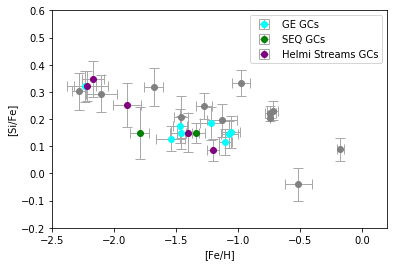

In [8]:
mask1 = (fe_h>-10)&(si_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
si_fe1 = si_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='M55')]),np.mean(fe_h1[np.where(gc_name1=='M10')]),\
     np.mean(fe_h1[np.where(gc_name1=='M4')]),np.mean(fe_h1[np.where(gc_name1=='N6441')])]
#      np.mean(fe_h1[np.where(gc_name1=='N6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
#     np.mean(fe_h1[np.where(gc_name1=='N6712')])]
ys_le = [np.mean(si_fe1[np.where(gc_name1=='M55')]),np.mean(si_fe1[np.where(gc_name1=='M10')]),\
     np.mean(si_fe1[np.where(gc_name1=='M4')]),np.mean(si_fe1[np.where(gc_name1=='N6441')])]
#      np.mean(si_fe1[np.where(gc_name1=='N6544')]),np.mean(si_fe1[np.where(gc_name1=='Pal6')]),\
#      np.mean(si_fe1[np.where(gc_name1=='N6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='M55')]),np.std(fe_h1[np.where(gc_name1=='M10')]),\
     np.std(fe_h1[np.where(gc_name1=='M4')]),np.std(fe_h1[np.where(gc_name1=='N6441')])]
#         np.std(fe_h1[np.where(gc_name1=='N6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
#         np.std(fe_h1[np.where(gc_name1=='N6712')])]
yerrs_le = [np.std(si_fe1[np.where(gc_name1=='M55')]),np.std(si_fe1[np.where(gc_name1=='M10')]),\
     np.std(si_fe1[np.where(gc_name1=='M4')]),np.std(si_fe1[np.where(gc_name1=='N6441')])]
#         np.std(si_fe1[np.where(gc_name1=='N6544')]),np.std(si_fe1[np.where(gc_name1=='Pal6')]),\
#         np.std(si_fe1[np.where(gc_name1=='N6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='N362')]),np.mean(fe_h1[np.where(gc_name1=='N1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='M79')]),np.mean(fe_h1[np.where(gc_name1=='N2808')]),\
#     np.mean(fe_h1[np.where(gc_name1=='N4147')]),np.mean(fe_h1[np.where(gc_name1=='N288')]),\
    np.mean(fe_h1[np.where(gc_name1=='M92')]),np.mean(fe_h1[np.where(gc_name1=='N6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='M13')]),np.mean(fe_h1[np.where(gc_name1=='M2')])]
ys_ge = [np.mean(si_fe1[np.where(gc_name1=='N362')]),np.mean(si_fe1[np.where(gc_name1=='N1851')]),\
     np.mean(si_fe1[np.where(gc_name1=='M79')]),np.mean(si_fe1[np.where(gc_name1=='N2808')]),\
#      np.mean(si_fe1[np.where(gc_name1=='N4147')]),np.mean(si_fe1[np.where(gc_name1=='N288')]),\
     np.mean(si_fe1[np.where(gc_name1=='M92')]),np.mean(si_fe1[np.where(gc_name1=='N6229')]),\
    np.mean(si_fe1[np.where(gc_name1=='M13')]),np.mean(si_fe1[np.where(gc_name1=='M2')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='N362')]),np.std(fe_h1[np.where(gc_name1=='N1851')]),\
     np.std(fe_h1[np.where(gc_name1=='M79')]),np.std(fe_h1[np.where(gc_name1=='N2808')]),\
#         np.std(fe_h1[np.where(gc_name1=='N4147')]),np.std(fe_h1[np.where(gc_name1=='N288')]),\
       np.std(fe_h1[np.where(gc_name1=='M92')]),np.std(fe_h1[np.where(gc_name1=='N6229')]),\
           np.std(fe_h1[np.where(gc_name1=='M13')]),np.std(fe_h1[np.where(gc_name1=='M2')])]
yerrs_ge = [np.std(si_fe1[np.where(gc_name1=='N362')]),np.std(si_fe1[np.where(gc_name1=='N1851')]),\
     np.std(si_fe1[np.where(gc_name1=='M79')]),np.std(si_fe1[np.where(gc_name1=='N2808')]),\
#     np.std(si_fe1[np.where(gc_name1=='N4147')]),np.std(si_fe1[np.where(gc_name1=='N288')]),\
      np.std(si_fe1[np.where(gc_name1=='M92')]),np.std(si_fe1[np.where(gc_name1=='N6229')]),\
           np.std(si_fe1[np.where(gc_name1=='M13')]),np.std(si_fe1[np.where(gc_name1=='M2')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='N5466')]),np.mean(fe_h1[np.where(gc_name1=='N3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='N5139')])]
ys_seq = [np.mean(si_fe1[np.where(gc_name1=='N5466')]),np.mean(si_fe1[np.where(gc_name1=='N3201')]),\
         np.mean(si_fe1[np.where(gc_name1=='N5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='N5466')]),np.std(fe_h1[np.where(gc_name1=='N3201')]),\
            np.std(fe_h1[np.where(gc_name1=='N5139')])]
yerrs_seq = [np.std(si_fe1[np.where(gc_name1=='N5466')]),np.std(si_fe1[np.where(gc_name1=='N3201')]),\
            np.std(si_fe1[np.where(gc_name1=='N5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='47TUC')]),np.mean(fe_h1[np.where(gc_name1=='N6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='M12')]),np.mean(fe_h1[np.where(gc_name1=='M71')]),\
    np.mean(fe_h1[np.where(gc_name1=='M15')]),\
    np.mean(fe_h1[np.where(gc_name1=='M22')]),np.mean(fe_h1[np.where(gc_name1=='N6752')])]
#     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\ np.mean(fe_h1[np.where(gc_name1=='N6352')]),
#         np.mean(fe_h1[np.where(gc_name1=='N6760')]),np.mean(fe_h1[np.where(gc_name1=='trzan12')])]

ys_md = [np.mean(si_fe1[np.where(gc_name1=='47TUC')]),np.mean(si_fe1[np.where(gc_name1=='N6397')]),\
     np.mean(si_fe1[np.where(gc_name1=='M12')]),np.mean(si_fe1[np.where(gc_name1=='M71')]),\
     np.mean(si_fe1[np.where(gc_name1=='M15')]),\
     np.mean(si_fe1[np.where(gc_name1=='M22')]),np.mean(si_fe1[np.where(gc_name1=='N6752')])]
#      np.mean(si_fe1[np.where(gc_name1=='Pal10')]),np.mean(si_fe1[np.where(gc_name1=='IC1276')]),\np.mean(si_fe1[np.where(gc_name1=='N6352')]),
#         np.mean(si_fe1[np.where(gc_name1=='N6760')]),np.mean(si_fe1[np.where(gc_name1=='trzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='47TUC')]),np.std(fe_h1[np.where(gc_name1=='N6397')]),\
     np.std(fe_h1[np.where(gc_name1=='M12')]),np.std(fe_h1[np.where(gc_name1=='M71')]),\
        np.std(fe_h1[np.where(gc_name1=='M15')]),\
        np.std(fe_h1[np.where(gc_name1=='M22')]),np.std(fe_h1[np.where(gc_name1=='N6752')])]
#         np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\np.std(fe_h1[np.where(gc_name1=='N6352')]),
#            np.std(fe_h1[np.where(gc_name1=='N6760')]),np.std(fe_h1[np.where(gc_name1=='trzan12')])]

yerrs_md = [np.std(si_fe1[np.where(gc_name1=='47TUC')]),np.std(si_fe1[np.where(gc_name1=='N6397')]),\
     np.std(si_fe1[np.where(gc_name1=='M12')]),np.std(si_fe1[np.where(gc_name1=='M71')]),\
        np.std(si_fe1[np.where(gc_name1=='M15')]),\
        np.std(si_fe1[np.where(gc_name1=='M22')]),np.std(si_fe1[np.where(gc_name1=='N6752')])]
#         np.std(si_fe1[np.where(gc_name1=='Pal10')]),np.std(si_fe1[np.where(gc_name1=='IC1276')]),\np.std(si_fe1[np.where(gc_name1=='N6352')]),
#            np.std(si_fe1[np.where(gc_name1=='N6760')]),np.std(si_fe1[np.where(gc_name1=='trzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='N6522')]),np.mean(fe_h1[np.where(gc_name1=='M107')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='N6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='N6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
#     np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='N6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='N6723')]),np.mean(fe_h1[np.where(gc_name1=='N6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='N6540')]),np.mean(fe_h1[np.where(gc_name1=='N6553')])]

ys_mb = [np.mean(si_fe1[np.where(gc_name1=='N6522')]),np.mean(si_fe1[np.where(gc_name1=='M107')]),\
     np.mean(si_fe1[np.where(gc_name1=='HP1')]),np.mean(si_fe1[np.where(gc_name1=='N6380')]),\
     np.mean(si_fe1[np.where(gc_name1=='N6388')]),np.mean(si_fe1[np.where(gc_name1=='Terzan9')]),\
#      np.mean(si_fe1[np.where(gc_name1=='Terzan4')]),np.mean(si_fe1[np.where(gc_name1=='N6539')]),\
              np.mean(si_fe1[np.where(gc_name1=='N6723')]),np.mean(si_fe1[np.where(gc_name1=='N6539')]),\
        np.mean(si_fe1[np.where(gc_name1=='N6540')]),np.mean(si_fe1[np.where(gc_name1=='N6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='N6522')]),np.std(fe_h1[np.where(gc_name1=='M107')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='N6380')]),\
        np.std(fe_h1[np.where(gc_name1=='N6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
#         np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='N6539')]),\
        np.std(fe_h1[np.where(gc_name1=='N6723')]),np.std(fe_h1[np.where(gc_name1=='N6539')]),\
           np.std(fe_h1[np.where(gc_name1=='N6540')]),np.std(fe_h1[np.where(gc_name1=='N6553')])]

yerrs_mb = [np.std(si_fe1[np.where(gc_name1=='N6522')]),np.std(si_fe1[np.where(gc_name1=='M107')]),\
     np.std(si_fe1[np.where(gc_name1=='HP1')]),np.std(si_fe1[np.where(gc_name1=='N6380')]),\
        np.std(si_fe1[np.where(gc_name1=='N6388')]),np.std(si_fe1[np.where(gc_name1=='Terzan9')]),\
#         np.std(si_fe1[np.where(gc_name1=='Terzan4')]),np.std(si_fe1[np.where(gc_name1=='N6539')]),\
        np.std(si_fe1[np.where(gc_name1=='N6723')]),np.std(si_fe1[np.where(gc_name1=='N6539')]),\
           np.std(si_fe1[np.where(gc_name1=='N6540')]),np.std(si_fe1[np.where(gc_name1=='N6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='M54')])]
ys_sag = [np.mean(si_fe1[np.where(gc_name1=='M54')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='M54')])]
yerrs_sag = [np.std(si_fe1[np.where(gc_name1=='M54')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='M53')]),np.mean(fe_h1[np.where(gc_name1=='N5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='M68')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='M68')]),\
       np.mean(fe_h1[np.where(gc_name1=='M3')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(si_fe1[np.where(gc_name1=='M53')]),np.mean(si_fe1[np.where(gc_name1=='N5053')]),\
#        np.mean(si_fe1[np.where(gc_name1=='M68')]),np.mean(si_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(si_fe1[np.where(gc_name1=='M68')]),\
       np.mean(si_fe1[np.where(gc_name1=='M3')]),np.mean(si_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='M53')]),np.std(fe_h1[np.where(gc_name1=='N5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='M68')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='M68')]),\
          np.std(fe_h1[np.where(gc_name1=='M3')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(si_fe1[np.where(gc_name1=='M53')]),np.std(si_fe1[np.where(gc_name1=='N5053')]),\
#           np.std(si_fe1[np.where(gc_name1=='M68')]),np.std(si_fe1[np.where(gc_name1=='Rup106')]),\
           np.std(si_fe1[np.where(gc_name1=='M68')]),\
          np.std(si_fe1[np.where(gc_name1=='M3')]),np.std(si_fe1[np.where(gc_name1=='Pal5')])]
# M5
xs_un = [np.mean(fe_h1[np.where(gc_name1=='M5')])]
ys_un = [np.mean(si_fe1[np.where(gc_name1=='M5')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='M5')])]
yerrs_un = [np.std(si_fe1[np.where(gc_name1=='M5')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(si_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(si_fe1[np.where(gc_name1=='Liller1')])]

# UKS1
xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
ys_uk = [np.mean(si_fe1[np.where(gc_name1=='UKS1')])]
xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
yerrs_uk = [np.std(si_fe1[np.where(gc_name1=='UKS1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
# plt.plot(xpoly_ge,ypoly_ge,'-',c='cyan')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
# plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# # plt.plot(xpoly_le,ypoly_le,'r-')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='gray',ecolor='darkgrey', elinewidth=1, capsize=5)
#              label='MD GCs')
# plt.plot(xpoly_md,ypoly_md,'b-')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='gray',ecolor='darkgrey', elinewidth=1, capsize=5)
#              label='MB GCs')
# plt.plot(xpoly_mb,ypoly_mb,'-',c='orange')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
# plt.plot(xpoly_hel,ypoly_hel,'-',c='purple')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='M5')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
# plt.errorbar(xs_uk,ys_uk,xerr = xerrs_uk,yerr= yerrs_uk,fmt='o', color='magenta',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='UKS1')
plt.ylabel('[Si/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper right')
plt.xlim(-2.5,0.2)
plt.ylim(-.2,.6)
plt.show()

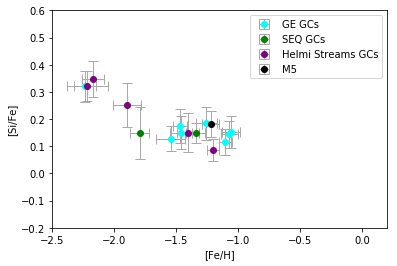

In [12]:
mask1 = (fe_h>-10)&(si_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
si_fe1 = si_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='M55')]),np.mean(fe_h1[np.where(gc_name1=='M10')]),\
     np.mean(fe_h1[np.where(gc_name1=='M4')]),np.mean(fe_h1[np.where(gc_name1=='N6441')])]
#      np.mean(fe_h1[np.where(gc_name1=='N6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
#     np.mean(fe_h1[np.where(gc_name1=='N6712')])]
ys_le = [np.mean(si_fe1[np.where(gc_name1=='M55')]),np.mean(si_fe1[np.where(gc_name1=='M10')]),\
     np.mean(si_fe1[np.where(gc_name1=='M4')]),np.mean(si_fe1[np.where(gc_name1=='N6441')])]
#      np.mean(si_fe1[np.where(gc_name1=='N6544')]),np.mean(si_fe1[np.where(gc_name1=='Pal6')]),\
#      np.mean(si_fe1[np.where(gc_name1=='N6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='M55')]),np.std(fe_h1[np.where(gc_name1=='M10')]),\
     np.std(fe_h1[np.where(gc_name1=='M4')]),np.std(fe_h1[np.where(gc_name1=='N6441')])]
#         np.std(fe_h1[np.where(gc_name1=='N6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
#         np.std(fe_h1[np.where(gc_name1=='N6712')])]
yerrs_le = [np.std(si_fe1[np.where(gc_name1=='M55')]),np.std(si_fe1[np.where(gc_name1=='M10')]),\
     np.std(si_fe1[np.where(gc_name1=='M4')]),np.std(si_fe1[np.where(gc_name1=='N6441')])]
#         np.std(si_fe1[np.where(gc_name1=='N6544')]),np.std(si_fe1[np.where(gc_name1=='Pal6')]),\
#         np.std(si_fe1[np.where(gc_name1=='N6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='N362')]),np.mean(fe_h1[np.where(gc_name1=='N1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='M79')]),np.mean(fe_h1[np.where(gc_name1=='N2808')]),\
#     np.mean(fe_h1[np.where(gc_name1=='N4147')]),np.mean(fe_h1[np.where(gc_name1=='N6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='M92')]),np.mean(fe_h1[np.where(gc_name1=='N288')]),\
    np.mean(fe_h1[np.where(gc_name1=='M13')]),np.mean(fe_h1[np.where(gc_name1=='M2')])]
ys_ge = [np.mean(si_fe1[np.where(gc_name1=='N362')]),np.mean(si_fe1[np.where(gc_name1=='N1851')]),\
     np.mean(si_fe1[np.where(gc_name1=='M79')]),np.mean(si_fe1[np.where(gc_name1=='N2808')]),\
#      np.mean(si_fe1[np.where(gc_name1=='N4147')]),np.mean(si_fe1[np.where(gc_name1=='N288')]),\
     np.mean(si_fe1[np.where(gc_name1=='M92')]),np.mean(si_fe1[np.where(gc_name1=='N6229')]),\
    np.mean(si_fe1[np.where(gc_name1=='M13')]),np.mean(si_fe1[np.where(gc_name1=='M2')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='N362')]),np.std(fe_h1[np.where(gc_name1=='N1851')]),\
     np.std(fe_h1[np.where(gc_name1=='M79')]),np.std(fe_h1[np.where(gc_name1=='N2808')]),\
#         np.std(fe_h1[np.where(gc_name1=='N4147')]),np.std(fe_h1[np.where(gc_name1=='N288')]),\
       np.std(fe_h1[np.where(gc_name1=='M92')]),np.std(fe_h1[np.where(gc_name1=='N6229')]),\
           np.std(fe_h1[np.where(gc_name1=='M13')]),np.std(fe_h1[np.where(gc_name1=='M2')])]
yerrs_ge = [np.std(si_fe1[np.where(gc_name1=='N362')]),np.std(si_fe1[np.where(gc_name1=='N1851')]),\
     np.std(si_fe1[np.where(gc_name1=='M79')]),np.std(si_fe1[np.where(gc_name1=='N2808')]),\
#     np.std(si_fe1[np.where(gc_name1=='N4147')]),np.std(si_fe1[np.where(gc_name1=='N288')]),\
      np.std(si_fe1[np.where(gc_name1=='M92')]),np.std(si_fe1[np.where(gc_name1=='N6229')]),\
           np.std(si_fe1[np.where(gc_name1=='M13')]),np.std(si_fe1[np.where(gc_name1=='M2')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='N5466')]),np.mean(fe_h1[np.where(gc_name1=='N3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='N5139')])]
ys_seq = [np.mean(si_fe1[np.where(gc_name1=='N5466')]),np.mean(si_fe1[np.where(gc_name1=='N3201')]),\
         np.mean(si_fe1[np.where(gc_name1=='N5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='N5466')]),np.std(fe_h1[np.where(gc_name1=='N3201')]),\
            np.std(fe_h1[np.where(gc_name1=='N5139')])]
yerrs_seq = [np.std(si_fe1[np.where(gc_name1=='N5466')]),np.std(si_fe1[np.where(gc_name1=='N3201')]),\
            np.std(si_fe1[np.where(gc_name1=='N5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='47TUC')]),np.mean(fe_h1[np.where(gc_name1=='N6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='M12')]),np.mean(fe_h1[np.where(gc_name1=='M71')]),\
    np.mean(fe_h1[np.where(gc_name1=='M15')]),\
    np.mean(fe_h1[np.where(gc_name1=='M22')]),np.mean(fe_h1[np.where(gc_name1=='N6752')])]
#     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\ np.mean(fe_h1[np.where(gc_name1=='N6352')]),
#         np.mean(fe_h1[np.where(gc_name1=='N6760')]),np.mean(fe_h1[np.where(gc_name1=='trzan12')])]

ys_md = [np.mean(si_fe1[np.where(gc_name1=='47TUC')]),np.mean(si_fe1[np.where(gc_name1=='N6397')]),\
     np.mean(si_fe1[np.where(gc_name1=='M12')]),np.mean(si_fe1[np.where(gc_name1=='M71')]),\
     np.mean(si_fe1[np.where(gc_name1=='M15')]),\
     np.mean(si_fe1[np.where(gc_name1=='M22')]),np.mean(si_fe1[np.where(gc_name1=='N6752')])]
#      np.mean(si_fe1[np.where(gc_name1=='Pal10')]),np.mean(si_fe1[np.where(gc_name1=='IC1276')]),\np.mean(si_fe1[np.where(gc_name1=='N6352')]),
#         np.mean(si_fe1[np.where(gc_name1=='N6760')]),np.mean(si_fe1[np.where(gc_name1=='trzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='47TUC')]),np.std(fe_h1[np.where(gc_name1=='N6397')]),\
     np.std(fe_h1[np.where(gc_name1=='M12')]),np.std(fe_h1[np.where(gc_name1=='M71')]),\
        np.std(fe_h1[np.where(gc_name1=='M15')]),\
        np.std(fe_h1[np.where(gc_name1=='M22')]),np.std(fe_h1[np.where(gc_name1=='N6752')])]
#         np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\np.std(fe_h1[np.where(gc_name1=='N6352')]),
#            np.std(fe_h1[np.where(gc_name1=='N6760')]),np.std(fe_h1[np.where(gc_name1=='trzan12')])]

yerrs_md = [np.std(si_fe1[np.where(gc_name1=='47TUC')]),np.std(si_fe1[np.where(gc_name1=='N6397')]),\
     np.std(si_fe1[np.where(gc_name1=='M12')]),np.std(si_fe1[np.where(gc_name1=='M71')]),\
        np.std(si_fe1[np.where(gc_name1=='M15')]),\
        np.std(si_fe1[np.where(gc_name1=='M22')]),np.std(si_fe1[np.where(gc_name1=='N6752')])]
#         np.std(si_fe1[np.where(gc_name1=='Pal10')]),np.std(si_fe1[np.where(gc_name1=='IC1276')]),\np.std(si_fe1[np.where(gc_name1=='N6352')]),
#            np.std(si_fe1[np.where(gc_name1=='N6760')]),np.std(si_fe1[np.where(gc_name1=='trzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='N6522')]),np.mean(fe_h1[np.where(gc_name1=='M107')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='N6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='N6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
#     np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='N6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='N6723')]),np.mean(fe_h1[np.where(gc_name1=='N6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='N6540')]),np.mean(fe_h1[np.where(gc_name1=='N6553')])]

ys_mb = [np.mean(si_fe1[np.where(gc_name1=='N6522')]),np.mean(si_fe1[np.where(gc_name1=='M107')]),\
     np.mean(si_fe1[np.where(gc_name1=='HP1')]),np.mean(si_fe1[np.where(gc_name1=='N6380')]),\
     np.mean(si_fe1[np.where(gc_name1=='N6388')]),np.mean(si_fe1[np.where(gc_name1=='Terzan9')]),\
#      np.mean(si_fe1[np.where(gc_name1=='Terzan4')]),np.mean(si_fe1[np.where(gc_name1=='N6539')]),\
              np.mean(si_fe1[np.where(gc_name1=='N6723')]),np.mean(si_fe1[np.where(gc_name1=='N6539')]),\
        np.mean(si_fe1[np.where(gc_name1=='N6540')]),np.mean(si_fe1[np.where(gc_name1=='N6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='N6522')]),np.std(fe_h1[np.where(gc_name1=='M107')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='N6380')]),\
        np.std(fe_h1[np.where(gc_name1=='N6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
#         np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='N6539')]),\
        np.std(fe_h1[np.where(gc_name1=='N6723')]),np.std(fe_h1[np.where(gc_name1=='N6539')]),\
           np.std(fe_h1[np.where(gc_name1=='N6540')]),np.std(fe_h1[np.where(gc_name1=='N6553')])]

yerrs_mb = [np.std(si_fe1[np.where(gc_name1=='N6522')]),np.std(si_fe1[np.where(gc_name1=='M107')]),\
     np.std(si_fe1[np.where(gc_name1=='HP1')]),np.std(si_fe1[np.where(gc_name1=='N6380')]),\
        np.std(si_fe1[np.where(gc_name1=='N6388')]),np.std(si_fe1[np.where(gc_name1=='Terzan9')]),\
#         np.std(si_fe1[np.where(gc_name1=='Terzan4')]),np.std(si_fe1[np.where(gc_name1=='N6539')]),\
        np.std(si_fe1[np.where(gc_name1=='N6723')]),np.std(si_fe1[np.where(gc_name1=='N6539')]),\
           np.std(si_fe1[np.where(gc_name1=='N6540')]),np.std(si_fe1[np.where(gc_name1=='N6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='M54')])]
ys_sag = [np.mean(si_fe1[np.where(gc_name1=='M54')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='M54')])]
yerrs_sag = [np.std(si_fe1[np.where(gc_name1=='M54')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='M53')]),np.mean(fe_h1[np.where(gc_name1=='N5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='M68')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='M68')]),\
       np.mean(fe_h1[np.where(gc_name1=='M3')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(si_fe1[np.where(gc_name1=='M53')]),np.mean(si_fe1[np.where(gc_name1=='N5053')]),\
#        np.mean(si_fe1[np.where(gc_name1=='M68')]),np.mean(si_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(si_fe1[np.where(gc_name1=='M68')]),\
       np.mean(si_fe1[np.where(gc_name1=='M3')]),np.mean(si_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='M53')]),np.std(fe_h1[np.where(gc_name1=='N5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='M68')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='M68')]),\
          np.std(fe_h1[np.where(gc_name1=='M3')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(si_fe1[np.where(gc_name1=='M53')]),np.std(si_fe1[np.where(gc_name1=='N5053')]),\
#           np.std(si_fe1[np.where(gc_name1=='M68')]),np.std(si_fe1[np.where(gc_name1=='Rup106')]),\
           np.std(si_fe1[np.where(gc_name1=='M68')]),\
          np.std(si_fe1[np.where(gc_name1=='M3')]),np.std(si_fe1[np.where(gc_name1=='Pal5')])]
# M5
xs_un = [np.mean(fe_h1[np.where(gc_name1=='M5')])]
ys_un = [np.mean(si_fe1[np.where(gc_name1=='M5')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='M5')])]
yerrs_un = [np.std(si_fe1[np.where(gc_name1=='M5')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(si_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(si_fe1[np.where(gc_name1=='Liller1')])]

# UKS1
xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
ys_uk = [np.mean(si_fe1[np.where(gc_name1=='UKS1')])]
xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
yerrs_uk = [np.std(si_fe1[np.where(gc_name1=='UKS1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
# plt.plot(xpoly_ge,ypoly_ge,'-',c='cyan')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
# plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# # plt.plot(xpoly_le,ypoly_le,'r-')
# plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='gray',ecolor='darkgrey', elinewidth=1, capsize=5)
#              label='MD GCs')
# plt.plot(xpoly_md,ypoly_md,'b-')
# plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='gray',ecolor='darkgrey', elinewidth=1, capsize=5)
#              label='MB GCs')
# plt.plot(xpoly_mb,ypoly_mb,'-',c='orange')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
# plt.plot(xpoly_hel,ypoly_hel,'-',c='purple')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='M5')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
# plt.errorbar(xs_uk,ys_uk,xerr = xerrs_uk,yerr= yerrs_uk,fmt='o', color='magenta',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='UKS1')
plt.ylabel('[Si/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper right')
plt.xlim(-2.5,0.2)
plt.ylim(-.2,.6)
plt.show()

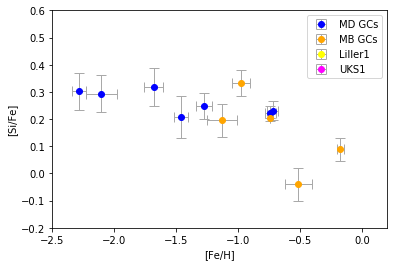

In [14]:
mask1 = (fe_h>-10)&(si_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
si_fe1 = si_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='M55')]),np.mean(fe_h1[np.where(gc_name1=='M10')]),\
     np.mean(fe_h1[np.where(gc_name1=='M4')]),np.mean(fe_h1[np.where(gc_name1=='N6441')])]
#      np.mean(fe_h1[np.where(gc_name1=='N6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
#     np.mean(fe_h1[np.where(gc_name1=='N6712')])]
ys_le = [np.mean(si_fe1[np.where(gc_name1=='M55')]),np.mean(si_fe1[np.where(gc_name1=='M10')]),\
     np.mean(si_fe1[np.where(gc_name1=='M4')]),np.mean(si_fe1[np.where(gc_name1=='N6441')])]
#      np.mean(si_fe1[np.where(gc_name1=='N6544')]),np.mean(si_fe1[np.where(gc_name1=='Pal6')]),\
#      np.mean(si_fe1[np.where(gc_name1=='N6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='M55')]),np.std(fe_h1[np.where(gc_name1=='M10')]),\
     np.std(fe_h1[np.where(gc_name1=='M4')]),np.std(fe_h1[np.where(gc_name1=='N6441')])]
#         np.std(fe_h1[np.where(gc_name1=='N6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
#         np.std(fe_h1[np.where(gc_name1=='N6712')])]
yerrs_le = [np.std(si_fe1[np.where(gc_name1=='M55')]),np.std(si_fe1[np.where(gc_name1=='M10')]),\
     np.std(si_fe1[np.where(gc_name1=='M4')]),np.std(si_fe1[np.where(gc_name1=='N6441')])]
#         np.std(si_fe1[np.where(gc_name1=='N6544')]),np.std(si_fe1[np.where(gc_name1=='Pal6')]),\
#         np.std(si_fe1[np.where(gc_name1=='N6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='N362')]),np.mean(fe_h1[np.where(gc_name1=='N1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='M79')]),np.mean(fe_h1[np.where(gc_name1=='N2808')]),\
#     np.mean(fe_h1[np.where(gc_name1=='N4147')]),np.mean(fe_h1[np.where(gc_name1=='N6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='M92')]),np.mean(fe_h1[np.where(gc_name1=='N288')]),\
    np.mean(fe_h1[np.where(gc_name1=='M13')]),np.mean(fe_h1[np.where(gc_name1=='M2')])]
ys_ge = [np.mean(si_fe1[np.where(gc_name1=='N362')]),np.mean(si_fe1[np.where(gc_name1=='N1851')]),\
     np.mean(si_fe1[np.where(gc_name1=='M79')]),np.mean(si_fe1[np.where(gc_name1=='N2808')]),\
#      np.mean(si_fe1[np.where(gc_name1=='N4147')]),np.mean(si_fe1[np.where(gc_name1=='N288')]),\
     np.mean(si_fe1[np.where(gc_name1=='M92')]),np.mean(si_fe1[np.where(gc_name1=='N6229')]),\
    np.mean(si_fe1[np.where(gc_name1=='M13')]),np.mean(si_fe1[np.where(gc_name1=='M2')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='N362')]),np.std(fe_h1[np.where(gc_name1=='N1851')]),\
     np.std(fe_h1[np.where(gc_name1=='M79')]),np.std(fe_h1[np.where(gc_name1=='N2808')]),\
#         np.std(fe_h1[np.where(gc_name1=='N4147')]),np.std(fe_h1[np.where(gc_name1=='N288')]),\
       np.std(fe_h1[np.where(gc_name1=='M92')]),np.std(fe_h1[np.where(gc_name1=='N6229')]),\
           np.std(fe_h1[np.where(gc_name1=='M13')]),np.std(fe_h1[np.where(gc_name1=='M2')])]
yerrs_ge = [np.std(si_fe1[np.where(gc_name1=='N362')]),np.std(si_fe1[np.where(gc_name1=='N1851')]),\
     np.std(si_fe1[np.where(gc_name1=='M79')]),np.std(si_fe1[np.where(gc_name1=='N2808')]),\
#     np.std(si_fe1[np.where(gc_name1=='N4147')]),np.std(si_fe1[np.where(gc_name1=='N288')]),\
      np.std(si_fe1[np.where(gc_name1=='M92')]),np.std(si_fe1[np.where(gc_name1=='N6229')]),\
           np.std(si_fe1[np.where(gc_name1=='M13')]),np.std(si_fe1[np.where(gc_name1=='M2')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='N5466')]),np.mean(fe_h1[np.where(gc_name1=='N3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='N5139')])]
ys_seq = [np.mean(si_fe1[np.where(gc_name1=='N5466')]),np.mean(si_fe1[np.where(gc_name1=='N3201')]),\
         np.mean(si_fe1[np.where(gc_name1=='N5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='N5466')]),np.std(fe_h1[np.where(gc_name1=='N3201')]),\
            np.std(fe_h1[np.where(gc_name1=='N5139')])]
yerrs_seq = [np.std(si_fe1[np.where(gc_name1=='N5466')]),np.std(si_fe1[np.where(gc_name1=='N3201')]),\
            np.std(si_fe1[np.where(gc_name1=='N5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='47TUC')]),np.mean(fe_h1[np.where(gc_name1=='N6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='M12')]),np.mean(fe_h1[np.where(gc_name1=='M71')]),\
    np.mean(fe_h1[np.where(gc_name1=='M15')]),\
    np.mean(fe_h1[np.where(gc_name1=='M22')]),np.mean(fe_h1[np.where(gc_name1=='N6752')])]
#     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\ np.mean(fe_h1[np.where(gc_name1=='N6352')]),
#         np.mean(fe_h1[np.where(gc_name1=='N6760')]),np.mean(fe_h1[np.where(gc_name1=='trzan12')])]

ys_md = [np.mean(si_fe1[np.where(gc_name1=='47TUC')]),np.mean(si_fe1[np.where(gc_name1=='N6397')]),\
     np.mean(si_fe1[np.where(gc_name1=='M12')]),np.mean(si_fe1[np.where(gc_name1=='M71')]),\
     np.mean(si_fe1[np.where(gc_name1=='M15')]),\
     np.mean(si_fe1[np.where(gc_name1=='M22')]),np.mean(si_fe1[np.where(gc_name1=='N6752')])]
#      np.mean(si_fe1[np.where(gc_name1=='Pal10')]),np.mean(si_fe1[np.where(gc_name1=='IC1276')]),\np.mean(si_fe1[np.where(gc_name1=='N6352')]),
#         np.mean(si_fe1[np.where(gc_name1=='N6760')]),np.mean(si_fe1[np.where(gc_name1=='trzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='47TUC')]),np.std(fe_h1[np.where(gc_name1=='N6397')]),\
     np.std(fe_h1[np.where(gc_name1=='M12')]),np.std(fe_h1[np.where(gc_name1=='M71')]),\
        np.std(fe_h1[np.where(gc_name1=='M15')]),\
        np.std(fe_h1[np.where(gc_name1=='M22')]),np.std(fe_h1[np.where(gc_name1=='N6752')])]
#         np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\np.std(fe_h1[np.where(gc_name1=='N6352')]),
#            np.std(fe_h1[np.where(gc_name1=='N6760')]),np.std(fe_h1[np.where(gc_name1=='trzan12')])]

yerrs_md = [np.std(si_fe1[np.where(gc_name1=='47TUC')]),np.std(si_fe1[np.where(gc_name1=='N6397')]),\
     np.std(si_fe1[np.where(gc_name1=='M12')]),np.std(si_fe1[np.where(gc_name1=='M71')]),\
        np.std(si_fe1[np.where(gc_name1=='M15')]),\
        np.std(si_fe1[np.where(gc_name1=='M22')]),np.std(si_fe1[np.where(gc_name1=='N6752')])]
#         np.std(si_fe1[np.where(gc_name1=='Pal10')]),np.std(si_fe1[np.where(gc_name1=='IC1276')]),\np.std(si_fe1[np.where(gc_name1=='N6352')]),
#            np.std(si_fe1[np.where(gc_name1=='N6760')]),np.std(si_fe1[np.where(gc_name1=='trzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='N6522')]),np.mean(fe_h1[np.where(gc_name1=='M107')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='N6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='N6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
#     np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='N6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='N6723')]),np.mean(fe_h1[np.where(gc_name1=='N6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='N6540')]),np.mean(fe_h1[np.where(gc_name1=='N6553')])]

ys_mb = [np.mean(si_fe1[np.where(gc_name1=='N6522')]),np.mean(si_fe1[np.where(gc_name1=='M107')]),\
     np.mean(si_fe1[np.where(gc_name1=='HP1')]),np.mean(si_fe1[np.where(gc_name1=='N6380')]),\
     np.mean(si_fe1[np.where(gc_name1=='N6388')]),np.mean(si_fe1[np.where(gc_name1=='Terzan9')]),\
#      np.mean(si_fe1[np.where(gc_name1=='Terzan4')]),np.mean(si_fe1[np.where(gc_name1=='N6539')]),\
              np.mean(si_fe1[np.where(gc_name1=='N6723')]),np.mean(si_fe1[np.where(gc_name1=='N6539')]),\
        np.mean(si_fe1[np.where(gc_name1=='N6540')]),np.mean(si_fe1[np.where(gc_name1=='N6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='N6522')]),np.std(fe_h1[np.where(gc_name1=='M107')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='N6380')]),\
        np.std(fe_h1[np.where(gc_name1=='N6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
#         np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='N6539')]),\
        np.std(fe_h1[np.where(gc_name1=='N6723')]),np.std(fe_h1[np.where(gc_name1=='N6539')]),\
           np.std(fe_h1[np.where(gc_name1=='N6540')]),np.std(fe_h1[np.where(gc_name1=='N6553')])]

yerrs_mb = [np.std(si_fe1[np.where(gc_name1=='N6522')]),np.std(si_fe1[np.where(gc_name1=='M107')]),\
     np.std(si_fe1[np.where(gc_name1=='HP1')]),np.std(si_fe1[np.where(gc_name1=='N6380')]),\
        np.std(si_fe1[np.where(gc_name1=='N6388')]),np.std(si_fe1[np.where(gc_name1=='Terzan9')]),\
#         np.std(si_fe1[np.where(gc_name1=='Terzan4')]),np.std(si_fe1[np.where(gc_name1=='N6539')]),\
        np.std(si_fe1[np.where(gc_name1=='N6723')]),np.std(si_fe1[np.where(gc_name1=='N6539')]),\
           np.std(si_fe1[np.where(gc_name1=='N6540')]),np.std(si_fe1[np.where(gc_name1=='N6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='M54')])]
ys_sag = [np.mean(si_fe1[np.where(gc_name1=='M54')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='M54')])]
yerrs_sag = [np.std(si_fe1[np.where(gc_name1=='M54')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='M53')]),np.mean(fe_h1[np.where(gc_name1=='N5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='M68')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='M68')]),\
       np.mean(fe_h1[np.where(gc_name1=='M3')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(si_fe1[np.where(gc_name1=='M53')]),np.mean(si_fe1[np.where(gc_name1=='N5053')]),\
#        np.mean(si_fe1[np.where(gc_name1=='M68')]),np.mean(si_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(si_fe1[np.where(gc_name1=='M68')]),\
       np.mean(si_fe1[np.where(gc_name1=='M3')]),np.mean(si_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='M53')]),np.std(fe_h1[np.where(gc_name1=='N5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='M68')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='M68')]),\
          np.std(fe_h1[np.where(gc_name1=='M3')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(si_fe1[np.where(gc_name1=='M53')]),np.std(si_fe1[np.where(gc_name1=='N5053')]),\
#           np.std(si_fe1[np.where(gc_name1=='M68')]),np.std(si_fe1[np.where(gc_name1=='Rup106')]),\
           np.std(si_fe1[np.where(gc_name1=='M68')]),\
          np.std(si_fe1[np.where(gc_name1=='M3')]),np.std(si_fe1[np.where(gc_name1=='Pal5')])]
# M5
xs_un = [np.mean(fe_h1[np.where(gc_name1=='M5')])]
ys_un = [np.mean(si_fe1[np.where(gc_name1=='M5')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='M5')])]
yerrs_un = [np.std(si_fe1[np.where(gc_name1=='M5')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(si_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(si_fe1[np.where(gc_name1=='Liller1')])]

# UKS1
xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
ys_uk = [np.mean(si_fe1[np.where(gc_name1=='UKS1')])]
xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
yerrs_uk = [np.std(si_fe1[np.where(gc_name1=='UKS1')])]

# plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='GE GCs')
# # plt.plot(xpoly_ge,ypoly_ge,'-',c='cyan')
# plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='SEQ GCs')
# plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# # plt.plot(xpoly_le,ypoly_le,'r-')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
# plt.plot(xpoly_md,ypoly_md,'b-')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
# plt.plot(xpoly_mb,ypoly_mb,'-',c='orange')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
# plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Helmi Streams GCs')
# plt.plot(xpoly_hel,ypoly_hel,'-',c='purple')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='M5')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.errorbar(xs_uk,ys_uk,xerr = xerrs_uk,yerr= yerrs_uk,fmt='o', color='magenta',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='UKS1')
plt.ylabel('[Si/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper right')
plt.xlim(-2.5,0.2)
plt.ylim(-.2,.6)
plt.show()

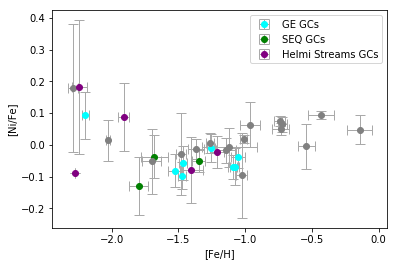

In [11]:
mask1 = (fe_h>-10)&(ni_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
ni_fe1 = ni_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')])]
#      np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(ni_fe1[np.where(gc_name1=='NGC6809')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC6121')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6441')])]
#      np.mean(ni_fe1[np.where(gc_name1=='NGC6544')]),np.mean(ni_fe1[np.where(gc_name1=='Pal6')]),\
#      np.mean(ni_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')])]
#         np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(ni_fe1[np.where(gc_name1=='NGC6809')]),np.std(ni_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(ni_fe1[np.where(gc_name1=='NGC6121')]),np.std(ni_fe1[np.where(gc_name1=='NGC6441')])]
#         np.std(ni_fe1[np.where(gc_name1=='NGC6544')]),np.std(ni_fe1[np.where(gc_name1=='Pal6')]),\
#         np.std(ni_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(ni_fe1[np.where(gc_name1=='NGC362')]),np.mean(ni_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC1904')]),np.mean(ni_fe1[np.where(gc_name1=='NGC2808')]),\
#      np.mean(ni_fe1[np.where(gc_name1=='NGC4147')]),np.mean(ni_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC6341')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(ni_fe1[np.where(gc_name1=='NGC6205')]),np.mean(ni_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(ni_fe1[np.where(gc_name1=='NGC362')]),np.std(ni_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(ni_fe1[np.where(gc_name1=='NGC1904')]),np.std(ni_fe1[np.where(gc_name1=='NGC2808')]),\
#     np.std(ni_fe1[np.where(gc_name1=='NGC4147')]),np.std(ni_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(ni_fe1[np.where(gc_name1=='NGC6341')]),np.std(ni_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(ni_fe1[np.where(gc_name1=='NGC6205')]),np.std(ni_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(ni_fe1[np.where(gc_name1=='NGC5466')]),np.mean(ni_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(ni_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(ni_fe1[np.where(gc_name1=='NGC5466')]),np.std(ni_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(ni_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')])]
#     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\ np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),
#         np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(ni_fe1[np.where(gc_name1=='NGC104')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6397')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC6218')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC6656')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6752')])]
#      np.mean(ni_fe1[np.where(gc_name1=='Pal10')]),np.mean(ni_fe1[np.where(gc_name1=='IC1276')]),\np.mean(ni_fe1[np.where(gc_name1=='NGC6352')]),
#         np.mean(ni_fe1[np.where(gc_name1=='NGC6760')]),np.mean(ni_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')])]
#         np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\np.std(fe_h1[np.where(gc_name1=='NGC6352')]),
#            np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(ni_fe1[np.where(gc_name1=='NGC104')]),np.std(ni_fe1[np.where(gc_name1=='NGC6397')]),\
     np.std(ni_fe1[np.where(gc_name1=='NGC6218')]),np.std(ni_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(ni_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(ni_fe1[np.where(gc_name1=='NGC6656')]),np.std(ni_fe1[np.where(gc_name1=='NGC6752')])]
#         np.std(ni_fe1[np.where(gc_name1=='Pal10')]),np.std(ni_fe1[np.where(gc_name1=='IC1276')]),\np.std(ni_fe1[np.where(gc_name1=='NGC6352')]),
#            np.std(ni_fe1[np.where(gc_name1=='NGC6760')]),np.std(ni_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
#     np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(ni_fe1[np.where(gc_name1=='NGC6522')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(ni_fe1[np.where(gc_name1=='HP1')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC6388')]),np.mean(ni_fe1[np.where(gc_name1=='Terzan9')]),\
#      np.mean(ni_fe1[np.where(gc_name1=='Terzan4')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(ni_fe1[np.where(gc_name1=='NGC6723')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6539')]),\
        np.mean(ni_fe1[np.where(gc_name1=='NGC6540')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
#         np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(ni_fe1[np.where(gc_name1=='NGC6522')]),np.std(ni_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(ni_fe1[np.where(gc_name1=='HP1')]),np.std(ni_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(ni_fe1[np.where(gc_name1=='NGC6388')]),np.std(ni_fe1[np.where(gc_name1=='Terzan9')]),\
#         np.std(ni_fe1[np.where(gc_name1=='Terzan4')]),np.std(ni_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(ni_fe1[np.where(gc_name1=='NGC6723')]),np.std(ni_fe1[np.where(gc_name1=='NGC6539')]),\
           np.std(ni_fe1[np.where(gc_name1=='NGC6540')]),np.std(ni_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(ni_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(ni_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(ni_fe1[np.where(gc_name1=='NGC5024')]),np.mean(ni_fe1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(ni_fe1[np.where(gc_name1=='NGC4590')]),np.mean(ni_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(ni_fe1[np.where(gc_name1=='NGC4590')]),\
       np.mean(ni_fe1[np.where(gc_name1=='NGC5272')]),np.mean(ni_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(ni_fe1[np.where(gc_name1=='NGC5024')]),np.std(ni_fe1[np.where(gc_name1=='NGC5053')]),\
#           np.std(ni_fe1[np.where(gc_name1=='NGC4590')]),np.std(ni_fe1[np.where(gc_name1=='Rup106')]),\
           np.std(ni_fe1[np.where(gc_name1=='NGC4590')]),\
          np.std(ni_fe1[np.where(gc_name1=='NGC5272')]),np.std(ni_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(ni_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(ni_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(ni_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(ni_fe1[np.where(gc_name1=='Liller1')])]

# UKS1
xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
ys_uk = [np.mean(ni_fe1[np.where(gc_name1=='UKS1')])]
xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
yerrs_uk = [np.std(ni_fe1[np.where(gc_name1=='UKS1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
# plt.plot(xpoly_ge,ypoly_ge,'-',c='cyan')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
# plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# # plt.plot(xpoly_le,ypoly_le,'r-')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='gray',ecolor='darkgrey', elinewidth=1, capsize=5)
#              label='MD GCs')
# plt.plot(xpoly_md,ypoly_md,'b-')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='gray',ecolor='darkgrey', elinewidth=1, capsize=5)
#              label='MB GCs')
# plt.plot(xpoly_mb,ypoly_mb,'-',c='orange')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
# plt.plot(xpoly_hel,ypoly_hel,'-',c='purple')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='NGC5904')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
# plt.errorbar(xs_uk,ys_uk,xerr = xerrs_uk,yerr= yerrs_uk,fmt='o', color='magenta',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='UKS1')
plt.ylabel('[Ni/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper right')
# plt.xlim(-2.5,0.2)
# plt.ylim(-.2,.6)
plt.show()

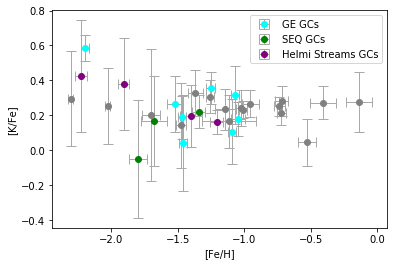

In [14]:
mask1 = (fe_h>-10)&(k_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
k_fe1 = k_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')])]
#      np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(k_fe1[np.where(gc_name1=='NGC6809')]),np.mean(k_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC6121')]),np.mean(k_fe1[np.where(gc_name1=='NGC6441')])]
#      np.mean(k_fe1[np.where(gc_name1=='NGC6544')]),np.mean(k_fe1[np.where(gc_name1=='Pal6')]),\
#      np.mean(k_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')])]
#         np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(k_fe1[np.where(gc_name1=='NGC6809')]),np.std(k_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(k_fe1[np.where(gc_name1=='NGC6121')]),np.std(k_fe1[np.where(gc_name1=='NGC6441')])]
#         np.std(k_fe1[np.where(gc_name1=='NGC6544')]),np.std(k_fe1[np.where(gc_name1=='Pal6')]),\
#         np.std(k_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(k_fe1[np.where(gc_name1=='NGC362')]),np.mean(k_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC1904')]),np.mean(k_fe1[np.where(gc_name1=='NGC2808')]),\
#      np.mean(k_fe1[np.where(gc_name1=='NGC4147')]),np.mean(k_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC6341')]),np.mean(k_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(k_fe1[np.where(gc_name1=='NGC6205')]),np.mean(k_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(k_fe1[np.where(gc_name1=='NGC362')]),np.std(k_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(k_fe1[np.where(gc_name1=='NGC1904')]),np.std(k_fe1[np.where(gc_name1=='NGC2808')]),\
#     np.std(k_fe1[np.where(gc_name1=='NGC4147')]),np.std(k_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(k_fe1[np.where(gc_name1=='NGC6341')]),np.std(k_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(k_fe1[np.where(gc_name1=='NGC6205')]),np.std(k_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(k_fe1[np.where(gc_name1=='NGC5466')]),np.mean(k_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(k_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(k_fe1[np.where(gc_name1=='NGC5466')]),np.std(k_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(k_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')])]
#     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\ np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),
#         np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(k_fe1[np.where(gc_name1=='NGC104')]),np.mean(k_fe1[np.where(gc_name1=='NGC6397')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC6218')]),np.mean(k_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC6656')]),np.mean(k_fe1[np.where(gc_name1=='NGC6752')])]
#      np.mean(k_fe1[np.where(gc_name1=='Pal10')]),np.mean(k_fe1[np.where(gc_name1=='IC1276')]),\np.mean(k_fe1[np.where(gc_name1=='NGC6352')]),
#         np.mean(k_fe1[np.where(gc_name1=='NGC6760')]),np.mean(k_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')])]
#         np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\np.std(fe_h1[np.where(gc_name1=='NGC6352')]),
#            np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(k_fe1[np.where(gc_name1=='NGC104')]),np.std(k_fe1[np.where(gc_name1=='NGC6397')]),\
     np.std(k_fe1[np.where(gc_name1=='NGC6218')]),np.std(k_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(k_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(k_fe1[np.where(gc_name1=='NGC6656')]),np.std(k_fe1[np.where(gc_name1=='NGC6752')])]
#         np.std(k_fe1[np.where(gc_name1=='Pal10')]),np.std(k_fe1[np.where(gc_name1=='IC1276')]),\np.std(k_fe1[np.where(gc_name1=='NGC6352')]),
#            np.std(k_fe1[np.where(gc_name1=='NGC6760')]),np.std(k_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
#     np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(k_fe1[np.where(gc_name1=='NGC6522')]),np.mean(k_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(k_fe1[np.where(gc_name1=='HP1')]),np.mean(k_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC6388')]),np.mean(k_fe1[np.where(gc_name1=='Terzan9')]),\
#      np.mean(k_fe1[np.where(gc_name1=='Terzan4')]),np.mean(k_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(k_fe1[np.where(gc_name1=='NGC6723')]),np.mean(k_fe1[np.where(gc_name1=='NGC6539')]),\
        np.mean(k_fe1[np.where(gc_name1=='NGC6540')]),np.mean(k_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
#         np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(k_fe1[np.where(gc_name1=='NGC6522')]),np.std(k_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(k_fe1[np.where(gc_name1=='HP1')]),np.std(k_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(k_fe1[np.where(gc_name1=='NGC6388')]),np.std(k_fe1[np.where(gc_name1=='Terzan9')]),\
#         np.std(k_fe1[np.where(gc_name1=='Terzan4')]),np.std(k_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(k_fe1[np.where(gc_name1=='NGC6723')]),np.std(k_fe1[np.where(gc_name1=='NGC6539')]),\
           np.std(k_fe1[np.where(gc_name1=='NGC6540')]),np.std(k_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(k_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(k_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(k_fe1[np.where(gc_name1=='NGC5024')]),np.mean(k_fe1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(k_fe1[np.where(gc_name1=='NGC4590')]),np.mean(k_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(k_fe1[np.where(gc_name1=='NGC4590')]),\
       np.mean(k_fe1[np.where(gc_name1=='NGC5272')]),np.mean(k_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(k_fe1[np.where(gc_name1=='NGC5024')]),np.std(k_fe1[np.where(gc_name1=='NGC5053')]),\
#           np.std(k_fe1[np.where(gc_name1=='NGC4590')]),np.std(k_fe1[np.where(gc_name1=='Rup106')]),\
           np.std(k_fe1[np.where(gc_name1=='NGC4590')]),\
          np.std(k_fe1[np.where(gc_name1=='NGC5272')]),np.std(k_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(k_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(k_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(k_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(k_fe1[np.where(gc_name1=='Liller1')])]

# UKS1
xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
ys_uk = [np.mean(k_fe1[np.where(gc_name1=='UKS1')])]
xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
yerrs_uk = [np.std(k_fe1[np.where(gc_name1=='UKS1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
# plt.plot(xpoly_ge,ypoly_ge,'-',c='cyan')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
# plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# # plt.plot(xpoly_le,ypoly_le,'r-')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='gray',ecolor='darkgrey', elinewidth=1, capsize=5)
#              label='MD GCs')
# plt.plot(xpoly_md,ypoly_md,'b-')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='gray',ecolor='darkgrey', elinewidth=1, capsize=5)
#              label='MB GCs')
# plt.plot(xpoly_mb,ypoly_mb,'-',c='orange')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
# plt.plot(xpoly_hel,ypoly_hel,'-',c='purple')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='NGC5904')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
# plt.errorbar(xs_uk,ys_uk,xerr = xerrs_uk,yerr= yerrs_uk,fmt='o', color='magenta',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='UKS1')
plt.ylabel('[K/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper right')
# plt.xlim(-2.5,0.2)
# plt.ylim(-.2,.6)
plt.show()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


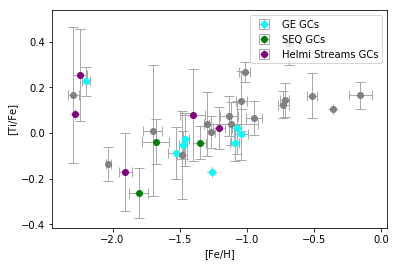

In [13]:
mask1 = (fe_h>-10)&(ti_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
ti_fe1 = ti_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')])]
#      np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(ti_fe1[np.where(gc_name1=='NGC6809')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC6121')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6441')])]
#      np.mean(ti_fe1[np.where(gc_name1=='NGC6544')]),np.mean(ti_fe1[np.where(gc_name1=='Pal6')]),\
#      np.mean(ti_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')])]
#         np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(ti_fe1[np.where(gc_name1=='NGC6809')]),np.std(ti_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(ti_fe1[np.where(gc_name1=='NGC6121')]),np.std(ti_fe1[np.where(gc_name1=='NGC6441')])]
#         np.std(ti_fe1[np.where(gc_name1=='NGC6544')]),np.std(ti_fe1[np.where(gc_name1=='Pal6')]),\
#         np.std(ti_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(ti_fe1[np.where(gc_name1=='NGC362')]),np.mean(ti_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC1904')]),np.mean(ti_fe1[np.where(gc_name1=='NGC2808')]),\
#      np.mean(ti_fe1[np.where(gc_name1=='NGC4147')]),np.mean(ti_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC6341')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(ti_fe1[np.where(gc_name1=='NGC6205')]),np.mean(ti_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(ti_fe1[np.where(gc_name1=='NGC362')]),np.std(ti_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(ti_fe1[np.where(gc_name1=='NGC1904')]),np.std(ti_fe1[np.where(gc_name1=='NGC2808')]),\
#     np.std(ti_fe1[np.where(gc_name1=='NGC4147')]),np.std(ti_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(ti_fe1[np.where(gc_name1=='NGC6341')]),np.std(ti_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(ti_fe1[np.where(gc_name1=='NGC6205')]),np.std(ti_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(ti_fe1[np.where(gc_name1=='NGC5466')]),np.mean(ti_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(ti_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(ti_fe1[np.where(gc_name1=='NGC5466')]),np.std(ti_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(ti_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')])]
#     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\ np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),
#         np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(ti_fe1[np.where(gc_name1=='NGC104')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6397')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC6218')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC6656')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6752')])]
#      np.mean(ti_fe1[np.where(gc_name1=='Pal10')]),np.mean(ti_fe1[np.where(gc_name1=='IC1276')]),\np.mean(ti_fe1[np.where(gc_name1=='NGC6352')]),
#         np.mean(ti_fe1[np.where(gc_name1=='NGC6760')]),np.mean(ti_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')])]
#         np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\np.std(fe_h1[np.where(gc_name1=='NGC6352')]),
#            np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(ti_fe1[np.where(gc_name1=='NGC104')]),np.std(ti_fe1[np.where(gc_name1=='NGC6397')]),\
     np.std(ti_fe1[np.where(gc_name1=='NGC6218')]),np.std(ti_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(ti_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(ti_fe1[np.where(gc_name1=='NGC6656')]),np.std(ti_fe1[np.where(gc_name1=='NGC6752')])]
#         np.std(ti_fe1[np.where(gc_name1=='Pal10')]),np.std(ti_fe1[np.where(gc_name1=='IC1276')]),\np.std(ti_fe1[np.where(gc_name1=='NGC6352')]),
#            np.std(ti_fe1[np.where(gc_name1=='NGC6760')]),np.std(ti_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
#     np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(ti_fe1[np.where(gc_name1=='NGC6522')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(ti_fe1[np.where(gc_name1=='HP1')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC6388')]),np.mean(ti_fe1[np.where(gc_name1=='Terzan9')]),\
#      np.mean(ti_fe1[np.where(gc_name1=='Terzan4')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(ti_fe1[np.where(gc_name1=='NGC6723')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6539')]),\
        np.mean(ti_fe1[np.where(gc_name1=='NGC6540')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
#         np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(ti_fe1[np.where(gc_name1=='NGC6522')]),np.std(ti_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(ti_fe1[np.where(gc_name1=='HP1')]),np.std(ti_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(ti_fe1[np.where(gc_name1=='NGC6388')]),np.std(ti_fe1[np.where(gc_name1=='Terzan9')]),\
#         np.std(ti_fe1[np.where(gc_name1=='Terzan4')]),np.std(ti_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(ti_fe1[np.where(gc_name1=='NGC6723')]),np.std(ti_fe1[np.where(gc_name1=='NGC6539')]),\
           np.std(ti_fe1[np.where(gc_name1=='NGC6540')]),np.std(ti_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(ti_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(ti_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(ti_fe1[np.where(gc_name1=='NGC5024')]),np.mean(ti_fe1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(ti_fe1[np.where(gc_name1=='NGC4590')]),np.mean(ti_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(ti_fe1[np.where(gc_name1=='NGC4590')]),\
       np.mean(ti_fe1[np.where(gc_name1=='NGC5272')]),np.mean(ti_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(ti_fe1[np.where(gc_name1=='NGC5024')]),np.std(ti_fe1[np.where(gc_name1=='NGC5053')]),\
#           np.std(ti_fe1[np.where(gc_name1=='NGC4590')]),np.std(ti_fe1[np.where(gc_name1=='Rup106')]),\
           np.std(ti_fe1[np.where(gc_name1=='NGC4590')]),\
          np.std(ti_fe1[np.where(gc_name1=='NGC5272')]),np.std(ti_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(ti_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(ti_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(ti_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(ti_fe1[np.where(gc_name1=='Liller1')])]

# UKS1
xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
ys_uk = [np.mean(ti_fe1[np.where(gc_name1=='UKS1')])]
xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
yerrs_uk = [np.std(ti_fe1[np.where(gc_name1=='UKS1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
# plt.plot(xpoly_ge,ypoly_ge,'-',c='cyan')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
# plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# # plt.plot(xpoly_le,ypoly_le,'r-')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='gray',ecolor='darkgrey', elinewidth=1, capsize=5)
#              label='MD GCs')
# plt.plot(xpoly_md,ypoly_md,'b-')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='gray',ecolor='darkgrey', elinewidth=1, capsize=5)
#              label='MB GCs')
# plt.plot(xpoly_mb,ypoly_mb,'-',c='orange')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
# plt.plot(xpoly_hel,ypoly_hel,'-',c='purple')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='NGC5904')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
# plt.errorbar(xs_uk,ys_uk,xerr = xerrs_uk,yerr= yerrs_uk,fmt='o', color='magenta',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='UKS1')
plt.ylabel('[Ti/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper right')
# plt.xlim(-2.5,0.2)
# plt.ylim(-.2,.6)
plt.show()

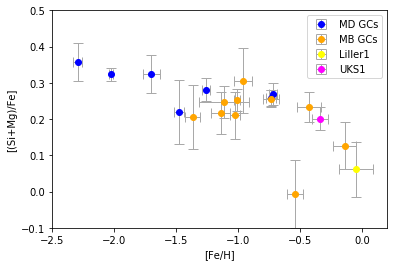

In [381]:
mask1 = (fe_h>-10)&(si_fe>-10)&(Teff<=4750)&(mg_fe>-10)
fe_h1 = fe_h[mask1]
si_fe1 = si_fe[mask1]
mg_fe1 = mg_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')])]
#      np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6809')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6254')]),\
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6121')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6441')])]
#      np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6544')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal6')]),\
#      np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')])]
#         np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6809')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6254')]),\
     np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6121')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6441')])]
#         np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6544')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal6')]),\
#         np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC362')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC1851')]),\
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC1904')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC2808')]),\
#      np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC4147')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC288')]),\
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6341')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6229')]),\
    np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6205')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC362')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC1851')]),\
     np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC1904')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC2808')]),\
#     np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC4147')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC288')]),\
      np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6341')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6229')]),\
           np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6205')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5466')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC3201')]),\
         np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5466')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC3201')]),\
            np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')])]
#     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\ np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),
#         np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC104')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6397')]),\
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6218')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6838')]),\
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC7078')]),\
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6656')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6752')])]
#      np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal10')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='IC1276')]),\np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6352')]),
#         np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6760')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')])]
#         np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\np.std(fe_h1[np.where(gc_name1=='NGC6352')]),
#            np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC104')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6397')]),\
     np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6218')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6838')]),\
        np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC7078')]),\
        np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6656')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6752')])]
#         np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal10')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='IC1276')]),\np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6352')]),
#            np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6760')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
#     np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6522')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6171')]),\
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='HP1')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6380')]),\
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6388')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan9')]),\
#      np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan4')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6539')]),\
              np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6723')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6539')]),\
        np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6540')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
#         np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6522')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6171')]),\
     np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='HP1')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6380')]),\
        np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6388')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan9')]),\
#         np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan4')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6539')]),\
        np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6723')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6539')]),\
           np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6540')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5024')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5053')]),\
#        np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC4590')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Rup106')]),\
        np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC4590')]),\
       np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5272')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5024')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5053')]),\
#           np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC4590')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Rup106')]),\
           np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC4590')]),\
          np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5272')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Liller1')])]

# UKS1
xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
ys_uk = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='UKS1')])]
xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
yerrs_uk = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='UKS1')])]

# plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='GE GCs')
# plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='SEQ GCs')
# plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# plt.plot(xpoly_le,ypoly_le,'r-')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
# plt.plot(xpoly_md,ypoly_md,'b-')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
# plt.plot(xpoly_mb,ypoly_mb,'-',c='orange')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
# plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Helmi Streams GCs')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.errorbar(xs_uk,ys_uk,xerr = xerrs_uk,yerr= yerrs_uk,fmt='o', color='magenta',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='UKS1')
plt.ylabel('[(Si+Mg)/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper right')
plt.xlim(-2.5,0.2)
plt.ylim(-.1,.5)
plt.show()

In [382]:
mask1 = (fe_h>-10)&(mg_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
mg_fe1 = mg_fe[mask1]

# get the values of the GCs associated to each subgroup, to then later plot the trend.
# L-E
fehs_le = np.hstack((np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')])))
alphas_le =np.hstack((np.mean(mg_fe1[np.where(gc_name1=='NGC6809')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6121')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6441')])))

# MAIN-DISC
fehs_md =np.hstack((np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')])))
alphas_md = np.hstack((np.mean(mg_fe1[np.where(gc_name1=='NGC104')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6397')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6218')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6656')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6752')])))
# MAIN-Bulge
fehs_mb =np.hstack((np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
#     np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])))
alphas_mb = np.hstack((np.mean(mg_fe1[np.where(gc_name1=='NGC6522')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(mg_fe1[np.where(gc_name1=='HP1')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6388')]),np.mean(mg_fe1[np.where(gc_name1=='Terzan9')]),\
#      np.mean(mg_fe1[np.where(gc_name1=='Terzan4')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(mg_fe1[np.where(gc_name1=='NGC6723')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6539')]),\
        np.mean(mg_fe1[np.where(gc_name1=='NGC6540')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6553')])))
# GE
fehs_ge = np.hstack((np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])))
alphas_ge =np.hstack((np.mean(mg_fe1[np.where(gc_name1=='NGC362')]),np.mean(mg_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC1904')]),np.mean(mg_fe1[np.where(gc_name1=='NGC2808')]),\
#      np.mean(mg_fe1[np.where(gc_name1=='NGC4147')]),np.mean(mg_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6341')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(mg_fe1[np.where(gc_name1=='NGC6205')]),np.mean(mg_fe1[np.where(gc_name1=='NGC7089')])))
# Helmi
fehs_hel = np.hstack((np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])))
alphas_hel =np.hstack((np.mean(mg_fe1[np.where(gc_name1=='NGC5024')]),np.mean(mg_fe1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(mg_fe1[np.where(gc_name1=='NGC4590')]),np.mean(mg_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(mg_fe1[np.where(gc_name1=='NGC4590')]),\
       np.mean(mg_fe1[np.where(gc_name1=='NGC5272')]),np.mean(mg_fe1[np.where(gc_name1=='Pal5')])))

xpoly_le2,ypoly_le2, coeffs_le2,poly_le2 = fit_func(fehs_le,alphas_le,2)
xpoly_md2,ypoly_md2, coeffs_md2,poly_md2 = fit_func(fehs_md,alphas_md,2)
xpoly_mb2,ypoly_mb2, coeffs_mb2,poly_mb2 = fit_func(fehs_mb,alphas_mb,2)
xpoly_ge2,ypoly_ge2, coeffs_ge2,poly_ge2 = fit_func(fehs_ge,alphas_ge,2)
xpoly_hel2,ypoly_hel2, coeffs_hel2,poly_hel2 = fit_func(fehs_hel,alphas_hel,2)

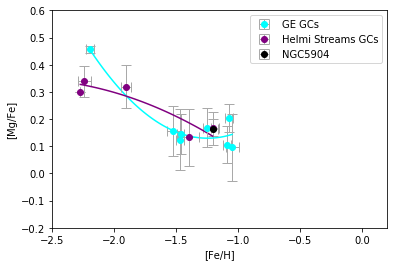

In [383]:
mask1 = (fe_h>-10)&(mg_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
mg_fe1 = mg_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')])]
#      np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(mg_fe1[np.where(gc_name1=='NGC6809')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6121')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6441')])]
#      np.mean(mg_fe1[np.where(gc_name1=='NGC6544')]),np.mean(mg_fe1[np.where(gc_name1=='Pal6')]),\
#      np.mean(mg_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')])]
#         np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(mg_fe1[np.where(gc_name1=='NGC6809')]),np.std(mg_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(mg_fe1[np.where(gc_name1=='NGC6121')]),np.std(mg_fe1[np.where(gc_name1=='NGC6441')])]
#         np.std(mg_fe1[np.where(gc_name1=='NGC6544')]),np.std(mg_fe1[np.where(gc_name1=='Pal6')]),\
#         np.std(mg_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(mg_fe1[np.where(gc_name1=='NGC362')]),np.mean(mg_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC1904')]),np.mean(mg_fe1[np.where(gc_name1=='NGC2808')]),\
#      np.mean(mg_fe1[np.where(gc_name1=='NGC4147')]),np.mean(mg_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6341')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(mg_fe1[np.where(gc_name1=='NGC6205')]),np.mean(mg_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(mg_fe1[np.where(gc_name1=='NGC362')]),np.std(mg_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(mg_fe1[np.where(gc_name1=='NGC1904')]),np.std(mg_fe1[np.where(gc_name1=='NGC2808')]),\
#     np.std(mg_fe1[np.where(gc_name1=='NGC4147')]),np.std(mg_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(mg_fe1[np.where(gc_name1=='NGC6341')]),np.std(mg_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(mg_fe1[np.where(gc_name1=='NGC6205')]),np.std(mg_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(mg_fe1[np.where(gc_name1=='NGC5466')]),np.mean(mg_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(mg_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(mg_fe1[np.where(gc_name1=='NGC5466')]),np.std(mg_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(mg_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')])]
#     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\ np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),
#         np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(mg_fe1[np.where(gc_name1=='NGC104')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6397')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6218')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6656')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6752')])]
#      np.mean(mg_fe1[np.where(gc_name1=='Pal10')]),np.mean(mg_fe1[np.where(gc_name1=='IC1276')]),\np.mean(mg_fe1[np.where(gc_name1=='NGC6352')]),
#         np.mean(mg_fe1[np.where(gc_name1=='NGC6760')]),np.mean(mg_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')])]
#         np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\np.std(fe_h1[np.where(gc_name1=='NGC6352')]),
#            np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(mg_fe1[np.where(gc_name1=='NGC104')]),np.std(mg_fe1[np.where(gc_name1=='NGC6397')]),\
     np.std(mg_fe1[np.where(gc_name1=='NGC6218')]),np.std(mg_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6656')]),np.std(mg_fe1[np.where(gc_name1=='NGC6752')])]
#         np.std(mg_fe1[np.where(gc_name1=='Pal10')]),np.std(mg_fe1[np.where(gc_name1=='IC1276')]),\np.std(mg_fe1[np.where(gc_name1=='NGC6352')]),
#            np.std(mg_fe1[np.where(gc_name1=='NGC6760')]),np.std(mg_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
#     np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(mg_fe1[np.where(gc_name1=='NGC6522')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(mg_fe1[np.where(gc_name1=='HP1')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6388')]),np.mean(mg_fe1[np.where(gc_name1=='Terzan9')]),\
#      np.mean(mg_fe1[np.where(gc_name1=='Terzan4')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(mg_fe1[np.where(gc_name1=='NGC6723')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6539')]),\
        np.mean(mg_fe1[np.where(gc_name1=='NGC6540')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
#         np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(mg_fe1[np.where(gc_name1=='NGC6522')]),np.std(mg_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(mg_fe1[np.where(gc_name1=='HP1')]),np.std(mg_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6388')]),np.std(mg_fe1[np.where(gc_name1=='Terzan9')]),\
#         np.std(mg_fe1[np.where(gc_name1=='Terzan4')]),np.std(mg_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6723')]),np.std(mg_fe1[np.where(gc_name1=='NGC6539')]),\
           np.std(mg_fe1[np.where(gc_name1=='NGC6540')]),np.std(mg_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(mg_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(mg_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(mg_fe1[np.where(gc_name1=='NGC5024')]),np.mean(mg_fe1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(mg_fe1[np.where(gc_name1=='NGC4590')]),np.mean(mg_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(mg_fe1[np.where(gc_name1=='NGC4590')]),\
       np.mean(mg_fe1[np.where(gc_name1=='NGC5272')]),np.mean(mg_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(mg_fe1[np.where(gc_name1=='NGC5024')]),np.std(mg_fe1[np.where(gc_name1=='NGC5053')]),\
#           np.std(mg_fe1[np.where(gc_name1=='NGC4590')]),np.std(mg_fe1[np.where(gc_name1=='Rup106')]),\
           np.std(mg_fe1[np.where(gc_name1=='NGC4590')]),\
          np.std(mg_fe1[np.where(gc_name1=='NGC5272')]),np.std(mg_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(mg_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(mg_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(mg_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(mg_fe1[np.where(gc_name1=='Liller1')])]

# UKS1
xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
ys_uk = [np.mean(mg_fe1[np.where(gc_name1=='UKS1')])]
xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
yerrs_uk = [np.std(mg_fe1[np.where(gc_name1=='UKS1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.plot(xpoly_ge2,ypoly_ge2,'-',c='cyan')
# plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='SEQ GCs')
# plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='MD GCs')
# plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='MB GCs')
# plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.plot(xpoly_hel2,ypoly_hel2,'-',c='purple')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
# plt.errorbar(xs_uk,ys_uk,xerr = xerrs_uk,yerr= yerrs_uk,fmt='o', color='magenta',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='UKS1')
plt.ylabel('[Mg/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper right')
plt.xlim(-2.5,0.2)
plt.ylim(-.2,.6)
plt.show()

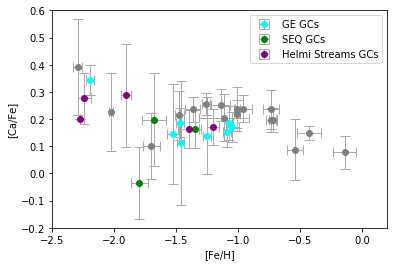

In [16]:
mask1 = (fe_h>-10)&(ca_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
ca_fe1 = ca_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')])]
#      np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(ca_fe1[np.where(gc_name1=='NGC6809')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6121')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6441')])]
#      np.mean(ca_fe1[np.where(gc_name1=='NGC6544')]),np.mean(ca_fe1[np.where(gc_name1=='Pal6')]),\
#      np.mean(ca_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')])]
#         np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(ca_fe1[np.where(gc_name1=='NGC6809')]),np.std(ca_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(ca_fe1[np.where(gc_name1=='NGC6121')]),np.std(ca_fe1[np.where(gc_name1=='NGC6441')])]
#         np.std(ca_fe1[np.where(gc_name1=='NGC6544')]),np.std(ca_fe1[np.where(gc_name1=='Pal6')]),\
#         np.std(ca_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(ca_fe1[np.where(gc_name1=='NGC362')]),np.mean(ca_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC1904')]),np.mean(ca_fe1[np.where(gc_name1=='NGC2808')]),\
#      np.mean(ca_fe1[np.where(gc_name1=='NGC4147')]),np.mean(ca_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6341')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(ca_fe1[np.where(gc_name1=='NGC6205')]),np.mean(ca_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(ca_fe1[np.where(gc_name1=='NGC362')]),np.std(ca_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(ca_fe1[np.where(gc_name1=='NGC1904')]),np.std(ca_fe1[np.where(gc_name1=='NGC2808')]),\
#     np.std(ca_fe1[np.where(gc_name1=='NGC4147')]),np.std(ca_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(ca_fe1[np.where(gc_name1=='NGC6341')]),np.std(ca_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(ca_fe1[np.where(gc_name1=='NGC6205')]),np.std(ca_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(ca_fe1[np.where(gc_name1=='NGC5466')]),np.mean(ca_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(ca_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(ca_fe1[np.where(gc_name1=='NGC5466')]),np.std(ca_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(ca_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')])]
#     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\ np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),
#         np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(ca_fe1[np.where(gc_name1=='NGC104')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6397')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6218')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6656')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6752')])]
#      np.mean(ca_fe1[np.where(gc_name1=='Pal10')]),np.mean(ca_fe1[np.where(gc_name1=='IC1276')]),\np.mean(ca_fe1[np.where(gc_name1=='NGC6352')]),
#         np.mean(ca_fe1[np.where(gc_name1=='NGC6760')]),np.mean(ca_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')])]
#         np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\np.std(fe_h1[np.where(gc_name1=='NGC6352')]),
#            np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(ca_fe1[np.where(gc_name1=='NGC104')]),np.std(ca_fe1[np.where(gc_name1=='NGC6397')]),\
     np.std(ca_fe1[np.where(gc_name1=='NGC6218')]),np.std(ca_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6656')]),np.std(ca_fe1[np.where(gc_name1=='NGC6752')])]
#         np.std(ca_fe1[np.where(gc_name1=='Pal10')]),np.std(ca_fe1[np.where(gc_name1=='IC1276')]),\np.std(ca_fe1[np.where(gc_name1=='NGC6352')]),
#            np.std(ca_fe1[np.where(gc_name1=='NGC6760')]),np.std(ca_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
#     np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(ca_fe1[np.where(gc_name1=='NGC6522')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(ca_fe1[np.where(gc_name1=='HP1')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6388')]),np.mean(ca_fe1[np.where(gc_name1=='Terzan9')]),\
#      np.mean(ca_fe1[np.where(gc_name1=='Terzan4')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(ca_fe1[np.where(gc_name1=='NGC6723')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6539')]),\
        np.mean(ca_fe1[np.where(gc_name1=='NGC6540')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
#         np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(ca_fe1[np.where(gc_name1=='NGC6522')]),np.std(ca_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(ca_fe1[np.where(gc_name1=='HP1')]),np.std(ca_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6388')]),np.std(ca_fe1[np.where(gc_name1=='Terzan9')]),\
#         np.std(ca_fe1[np.where(gc_name1=='Terzan4')]),np.std(ca_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6723')]),np.std(ca_fe1[np.where(gc_name1=='NGC6539')]),\
           np.std(ca_fe1[np.where(gc_name1=='NGC6540')]),np.std(ca_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(ca_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(ca_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(ca_fe1[np.where(gc_name1=='NGC5024')]),np.mean(ca_fe1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(ca_fe1[np.where(gc_name1=='NGC4590')]),np.mean(ca_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(ca_fe1[np.where(gc_name1=='NGC4590')]),\
       np.mean(ca_fe1[np.where(gc_name1=='NGC5272')]),np.mean(ca_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(ca_fe1[np.where(gc_name1=='NGC5024')]),np.std(ca_fe1[np.where(gc_name1=='NGC5053')]),\
#           np.std(ca_fe1[np.where(gc_name1=='NGC4590')]),np.std(ca_fe1[np.where(gc_name1=='Rup106')]),\
           np.std(ca_fe1[np.where(gc_name1=='NGC4590')]),\
          np.std(ca_fe1[np.where(gc_name1=='NGC5272')]),np.std(ca_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(ca_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(ca_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(ca_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(ca_fe1[np.where(gc_name1=='Liller1')])]

# UKS1
xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
ys_uk = [np.mean(ca_fe1[np.where(gc_name1=='UKS1')])]
xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
yerrs_uk = [np.std(ca_fe1[np.where(gc_name1=='UKS1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
# plt.plot(xpoly_ge,ypoly_ge,'-',c='cyan')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
# plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# # plt.plot(xpoly_le,ypoly_le,'r-')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='gray',ecolor='darkgrey', elinewidth=1, capsize=5)
#              label='MD GCs')
# plt.plot(xpoly_md,ypoly_md,'b-')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='gray',ecolor='darkgrey', elinewidth=1, capsize=5)
#              label='MB GCs')
# plt.plot(xpoly_mb,ypoly_mb,'-',c='orange')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
# plt.plot(xpoly_hel,ypoly_hel,'-',c='purple')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='NGC5904')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
# plt.errorbar(xs_uk,ys_uk,xerr = xerrs_uk,yerr= yerrs_uk,fmt='o', color='magenta',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='UKS1')
plt.ylabel('[Ca/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper right')
plt.xlim(-2.5,0.2)
plt.ylim(-.2,.6)
plt.show()

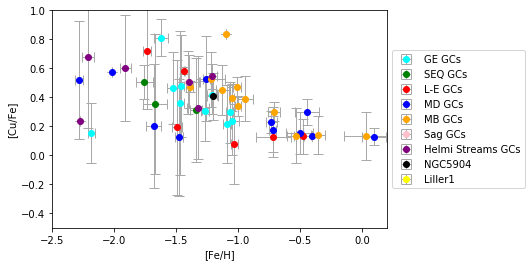

In [115]:
mask1 = (fe_h>-10)&(cu_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
cu_fe1 = cu_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(cu_fe1[np.where(gc_name1=='NGC6809')]),np.mean(cu_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(cu_fe1[np.where(gc_name1=='NGC6121')]),np.mean(cu_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(cu_fe1[np.where(gc_name1=='NGC6544')]),np.mean(cu_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(cu_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(cu_fe1[np.where(gc_name1=='NGC6809')]),np.std(cu_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(cu_fe1[np.where(gc_name1=='NGC6121')]),np.std(cu_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(cu_fe1[np.where(gc_name1=='NGC6544')]),np.std(cu_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(cu_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(cu_fe1[np.where(gc_name1=='NGC362')]),np.mean(cu_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(cu_fe1[np.where(gc_name1=='NGC1904')]),np.mean(cu_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(cu_fe1[np.where(gc_name1=='NGC4147')]),np.mean(cu_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(cu_fe1[np.where(gc_name1=='NGC6341')]),np.mean(cu_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(cu_fe1[np.where(gc_name1=='NGC6205')]),np.mean(cu_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(cu_fe1[np.where(gc_name1=='NGC362')]),np.std(cu_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(cu_fe1[np.where(gc_name1=='NGC1904')]),np.std(cu_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(cu_fe1[np.where(gc_name1=='NGC4147')]),np.std(cu_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(cu_fe1[np.where(gc_name1=='NGC6341')]),np.std(cu_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(cu_fe1[np.where(gc_name1=='NGC6205')]),np.std(cu_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(cu_fe1[np.where(gc_name1=='NGC5466')]),np.mean(cu_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(cu_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(cu_fe1[np.where(gc_name1=='NGC5466')]),np.std(cu_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(cu_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(cu_fe1[np.where(gc_name1=='NGC104')]),np.mean(cu_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(cu_fe1[np.where(gc_name1=='NGC6218')]),np.mean(cu_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(cu_fe1[np.where(gc_name1=='NGC6397')]),np.mean(cu_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(cu_fe1[np.where(gc_name1=='NGC6656')]),np.mean(cu_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(cu_fe1[np.where(gc_name1=='Pal10')]),np.mean(cu_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(cu_fe1[np.where(gc_name1=='NGC6760')]),np.mean(cu_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(cu_fe1[np.where(gc_name1=='NGC104')]),np.std(cu_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(cu_fe1[np.where(gc_name1=='NGC6218')]),np.std(cu_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(cu_fe1[np.where(gc_name1=='NGC6397')]),np.std(cu_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(cu_fe1[np.where(gc_name1=='NGC6656')]),np.std(cu_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(cu_fe1[np.where(gc_name1=='Pal10')]),np.std(cu_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(cu_fe1[np.where(gc_name1=='NGC6760')]),np.std(cu_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(cu_fe1[np.where(gc_name1=='Terzan4')]),np.mean(cu_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(cu_fe1[np.where(gc_name1=='HP1')]),np.mean(cu_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(cu_fe1[np.where(gc_name1=='NGC6388')]),np.mean(cu_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(cu_fe1[np.where(gc_name1=='NGC6522')]),np.mean(cu_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(cu_fe1[np.where(gc_name1=='NGC6723')]),np.mean(cu_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(cu_fe1[np.where(gc_name1=='NGC6540')]),np.mean(cu_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(cu_fe1[np.where(gc_name1=='Terzan4')]),np.std(cu_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(cu_fe1[np.where(gc_name1=='HP1')]),np.std(cu_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(cu_fe1[np.where(gc_name1=='NGC6388')]),np.std(cu_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(cu_fe1[np.where(gc_name1=='NGC6522')]),np.std(cu_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(cu_fe1[np.where(gc_name1=='NGC6723')]),np.std(cu_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(cu_fe1[np.where(gc_name1=='NGC6540')]),np.std(cu_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(cu_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(cu_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(cu_fe1[np.where(gc_name1=='NGC4590')]),np.mean(cu_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(cu_fe1[np.where(gc_name1=='NGC5024')]),np.mean(cu_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(cu_fe1[np.where(gc_name1=='NGC5272')]),np.mean(cu_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(cu_fe1[np.where(gc_name1=='NGC4590')]),np.std(cu_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(cu_fe1[np.where(gc_name1=='NGC5024')]),np.std(cu_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(cu_fe1[np.where(gc_name1=='NGC5272')]),np.std(cu_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(cu_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(cu_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(cu_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(cu_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[Cu/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.5,1.)
plt.show()

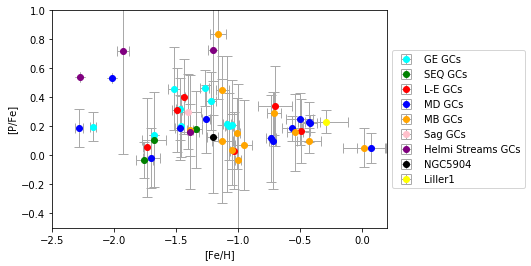

In [116]:
mask1 = (fe_h>-10)&(p_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
p_fe1 = p_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(p_fe1[np.where(gc_name1=='NGC6809')]),np.mean(p_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(p_fe1[np.where(gc_name1=='NGC6121')]),np.mean(p_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(p_fe1[np.where(gc_name1=='NGC6544')]),np.mean(p_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(p_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(p_fe1[np.where(gc_name1=='NGC6809')]),np.std(p_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(p_fe1[np.where(gc_name1=='NGC6121')]),np.std(p_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(p_fe1[np.where(gc_name1=='NGC6544')]),np.std(p_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(p_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(p_fe1[np.where(gc_name1=='NGC362')]),np.mean(p_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(p_fe1[np.where(gc_name1=='NGC1904')]),np.mean(p_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(p_fe1[np.where(gc_name1=='NGC4147')]),np.mean(p_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(p_fe1[np.where(gc_name1=='NGC6341')]),np.mean(p_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(p_fe1[np.where(gc_name1=='NGC6205')]),np.mean(p_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(p_fe1[np.where(gc_name1=='NGC362')]),np.std(p_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(p_fe1[np.where(gc_name1=='NGC1904')]),np.std(p_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(p_fe1[np.where(gc_name1=='NGC4147')]),np.std(p_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(p_fe1[np.where(gc_name1=='NGC6341')]),np.std(p_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(p_fe1[np.where(gc_name1=='NGC6205')]),np.std(p_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(p_fe1[np.where(gc_name1=='NGC5466')]),np.mean(p_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(p_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(p_fe1[np.where(gc_name1=='NGC5466')]),np.std(p_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(p_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(p_fe1[np.where(gc_name1=='NGC104')]),np.mean(p_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(p_fe1[np.where(gc_name1=='NGC6218')]),np.mean(p_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(p_fe1[np.where(gc_name1=='NGC6397')]),np.mean(p_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(p_fe1[np.where(gc_name1=='NGC6656')]),np.mean(p_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(p_fe1[np.where(gc_name1=='Pal10')]),np.mean(p_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(p_fe1[np.where(gc_name1=='NGC6760')]),np.mean(p_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(p_fe1[np.where(gc_name1=='NGC104')]),np.std(p_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(p_fe1[np.where(gc_name1=='NGC6218')]),np.std(p_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(p_fe1[np.where(gc_name1=='NGC6397')]),np.std(p_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(p_fe1[np.where(gc_name1=='NGC6656')]),np.std(p_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(p_fe1[np.where(gc_name1=='Pal10')]),np.std(p_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(p_fe1[np.where(gc_name1=='NGC6760')]),np.std(p_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(p_fe1[np.where(gc_name1=='Terzan4')]),np.mean(p_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(p_fe1[np.where(gc_name1=='HP1')]),np.mean(p_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(p_fe1[np.where(gc_name1=='NGC6388')]),np.mean(p_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(p_fe1[np.where(gc_name1=='NGC6522')]),np.mean(p_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(p_fe1[np.where(gc_name1=='NGC6723')]),np.mean(p_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(p_fe1[np.where(gc_name1=='NGC6540')]),np.mean(p_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(p_fe1[np.where(gc_name1=='Terzan4')]),np.std(p_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(p_fe1[np.where(gc_name1=='HP1')]),np.std(p_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(p_fe1[np.where(gc_name1=='NGC6388')]),np.std(p_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(p_fe1[np.where(gc_name1=='NGC6522')]),np.std(p_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(p_fe1[np.where(gc_name1=='NGC6723')]),np.std(p_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(p_fe1[np.where(gc_name1=='NGC6540')]),np.std(p_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(p_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(p_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(p_fe1[np.where(gc_name1=='NGC4590')]),np.mean(p_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(p_fe1[np.where(gc_name1=='NGC5024')]),np.mean(p_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(p_fe1[np.where(gc_name1=='NGC5272')]),np.mean(p_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(p_fe1[np.where(gc_name1=='NGC4590')]),np.std(p_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(p_fe1[np.where(gc_name1=='NGC5024')]),np.std(p_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(p_fe1[np.where(gc_name1=='NGC5272')]),np.std(p_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(p_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(p_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(p_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(p_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[P/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.5,1.)
plt.show()

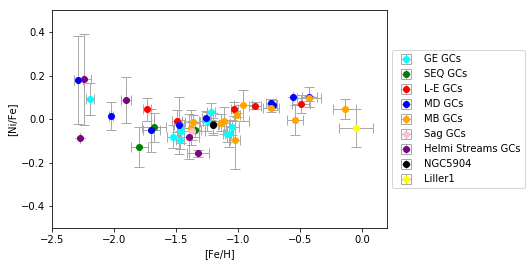

In [286]:
mask1 = (fe_h>-10)&(ni_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
ni_fe1 = ni_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(ni_fe1[np.where(gc_name1=='NGC6809')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC6121')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC6544')]),np.mean(ni_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(ni_fe1[np.where(gc_name1=='NGC6809')]),np.std(ni_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(ni_fe1[np.where(gc_name1=='NGC6121')]),np.std(ni_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(ni_fe1[np.where(gc_name1=='NGC6544')]),np.std(ni_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(ni_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(ni_fe1[np.where(gc_name1=='NGC362')]),np.mean(ni_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC1904')]),np.mean(ni_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC4147')]),np.mean(ni_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC6341')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(ni_fe1[np.where(gc_name1=='NGC6205')]),np.mean(ni_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(ni_fe1[np.where(gc_name1=='NGC362')]),np.std(ni_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(ni_fe1[np.where(gc_name1=='NGC1904')]),np.std(ni_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(ni_fe1[np.where(gc_name1=='NGC4147')]),np.std(ni_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(ni_fe1[np.where(gc_name1=='NGC6341')]),np.std(ni_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(ni_fe1[np.where(gc_name1=='NGC6205')]),np.std(ni_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(ni_fe1[np.where(gc_name1=='NGC5466')]),np.mean(ni_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(ni_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(ni_fe1[np.where(gc_name1=='NGC5466')]),np.std(ni_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(ni_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(ni_fe1[np.where(gc_name1=='NGC104')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC6218')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC6397')]),np.mean(ni_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC6656')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(ni_fe1[np.where(gc_name1=='Pal10')]),np.mean(ni_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(ni_fe1[np.where(gc_name1=='NGC6760')]),np.mean(ni_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(ni_fe1[np.where(gc_name1=='NGC104')]),np.std(ni_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(ni_fe1[np.where(gc_name1=='NGC6218')]),np.std(ni_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(ni_fe1[np.where(gc_name1=='NGC6397')]),np.std(ni_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(ni_fe1[np.where(gc_name1=='NGC6656')]),np.std(ni_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(ni_fe1[np.where(gc_name1=='Pal10')]),np.std(ni_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(ni_fe1[np.where(gc_name1=='NGC6760')]),np.std(ni_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(ni_fe1[np.where(gc_name1=='Terzan4')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(ni_fe1[np.where(gc_name1=='HP1')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC6388')]),np.mean(ni_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(ni_fe1[np.where(gc_name1=='NGC6522')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(ni_fe1[np.where(gc_name1=='NGC6723')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(ni_fe1[np.where(gc_name1=='NGC6540')]),np.mean(ni_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(ni_fe1[np.where(gc_name1=='Terzan4')]),np.std(ni_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(ni_fe1[np.where(gc_name1=='HP1')]),np.std(ni_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(ni_fe1[np.where(gc_name1=='NGC6388')]),np.std(ni_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(ni_fe1[np.where(gc_name1=='NGC6522')]),np.std(ni_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(ni_fe1[np.where(gc_name1=='NGC6723')]),np.std(ni_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(ni_fe1[np.where(gc_name1=='NGC6540')]),np.std(ni_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(ni_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(ni_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(ni_fe1[np.where(gc_name1=='NGC4590')]),np.mean(ni_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(ni_fe1[np.where(gc_name1=='NGC5024')]),np.mean(ni_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(ni_fe1[np.where(gc_name1=='NGC5272')]),np.mean(ni_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(ni_fe1[np.where(gc_name1=='NGC4590')]),np.std(ni_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(ni_fe1[np.where(gc_name1=='NGC5024')]),np.std(ni_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(ni_fe1[np.where(gc_name1=='NGC5272')]),np.std(ni_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(ni_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(ni_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(ni_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(ni_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[Ni/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.5,.5)
plt.show()

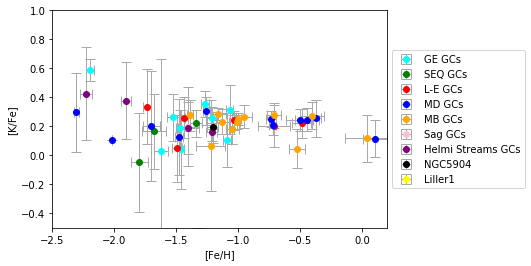

In [118]:
mask1 = (fe_h>-10)&(k_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
k_fe1 = k_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(k_fe1[np.where(gc_name1=='NGC6809')]),np.mean(k_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC6121')]),np.mean(k_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC6544')]),np.mean(k_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(k_fe1[np.where(gc_name1=='NGC6809')]),np.std(k_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(k_fe1[np.where(gc_name1=='NGC6121')]),np.std(k_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(k_fe1[np.where(gc_name1=='NGC6544')]),np.std(k_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(k_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(k_fe1[np.where(gc_name1=='NGC362')]),np.mean(k_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC1904')]),np.mean(k_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC4147')]),np.mean(k_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC6341')]),np.mean(k_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(k_fe1[np.where(gc_name1=='NGC6205')]),np.mean(k_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(k_fe1[np.where(gc_name1=='NGC362')]),np.std(k_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(k_fe1[np.where(gc_name1=='NGC1904')]),np.std(k_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(k_fe1[np.where(gc_name1=='NGC4147')]),np.std(k_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(k_fe1[np.where(gc_name1=='NGC6341')]),np.std(k_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(k_fe1[np.where(gc_name1=='NGC6205')]),np.std(k_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(k_fe1[np.where(gc_name1=='NGC5466')]),np.mean(k_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(k_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(k_fe1[np.where(gc_name1=='NGC5466')]),np.std(k_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(k_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(k_fe1[np.where(gc_name1=='NGC104')]),np.mean(k_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC6218')]),np.mean(k_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC6397')]),np.mean(k_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC6656')]),np.mean(k_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(k_fe1[np.where(gc_name1=='Pal10')]),np.mean(k_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(k_fe1[np.where(gc_name1=='NGC6760')]),np.mean(k_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(k_fe1[np.where(gc_name1=='NGC104')]),np.std(k_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(k_fe1[np.where(gc_name1=='NGC6218')]),np.std(k_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(k_fe1[np.where(gc_name1=='NGC6397')]),np.std(k_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(k_fe1[np.where(gc_name1=='NGC6656')]),np.std(k_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(k_fe1[np.where(gc_name1=='Pal10')]),np.std(k_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(k_fe1[np.where(gc_name1=='NGC6760')]),np.std(k_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(k_fe1[np.where(gc_name1=='Terzan4')]),np.mean(k_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(k_fe1[np.where(gc_name1=='HP1')]),np.mean(k_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC6388')]),np.mean(k_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(k_fe1[np.where(gc_name1=='NGC6522')]),np.mean(k_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(k_fe1[np.where(gc_name1=='NGC6723')]),np.mean(k_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(k_fe1[np.where(gc_name1=='NGC6540')]),np.mean(k_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(k_fe1[np.where(gc_name1=='Terzan4')]),np.std(k_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(k_fe1[np.where(gc_name1=='HP1')]),np.std(k_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(k_fe1[np.where(gc_name1=='NGC6388')]),np.std(k_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(k_fe1[np.where(gc_name1=='NGC6522')]),np.std(k_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(k_fe1[np.where(gc_name1=='NGC6723')]),np.std(k_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(k_fe1[np.where(gc_name1=='NGC6540')]),np.std(k_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(k_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(k_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(k_fe1[np.where(gc_name1=='NGC4590')]),np.mean(k_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(k_fe1[np.where(gc_name1=='NGC5024')]),np.mean(k_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(k_fe1[np.where(gc_name1=='NGC5272')]),np.mean(k_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(k_fe1[np.where(gc_name1=='NGC4590')]),np.std(k_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(k_fe1[np.where(gc_name1=='NGC5024')]),np.std(k_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(k_fe1[np.where(gc_name1=='NGC5272')]),np.std(k_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(k_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(k_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(k_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(k_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[K/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.5,1.)
plt.show()

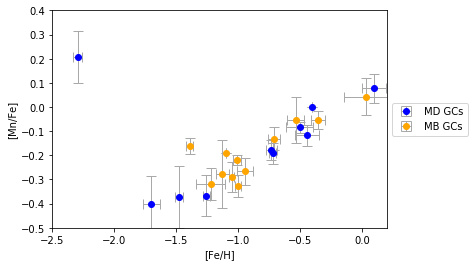

In [217]:
mask1 = (fe_h>-10)&(mn_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
mn_fe1 = mn_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(mn_fe1[np.where(gc_name1=='NGC6809')]),np.mean(mn_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(mn_fe1[np.where(gc_name1=='NGC6121')]),np.mean(mn_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(mn_fe1[np.where(gc_name1=='NGC6544')]),np.mean(mn_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(mn_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(mn_fe1[np.where(gc_name1=='NGC6809')]),np.std(mn_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(mn_fe1[np.where(gc_name1=='NGC6121')]),np.std(mn_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(mn_fe1[np.where(gc_name1=='NGC6544')]),np.std(mn_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(mn_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(mn_fe1[np.where(gc_name1=='NGC362')]),np.mean(mn_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(mn_fe1[np.where(gc_name1=='NGC1904')]),np.mean(mn_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(mn_fe1[np.where(gc_name1=='NGC4147')]),np.mean(mn_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(mn_fe1[np.where(gc_name1=='NGC6341')]),np.mean(mn_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(mn_fe1[np.where(gc_name1=='NGC6205')]),np.mean(mn_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(mn_fe1[np.where(gc_name1=='NGC362')]),np.std(mn_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(mn_fe1[np.where(gc_name1=='NGC1904')]),np.std(mn_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(mn_fe1[np.where(gc_name1=='NGC4147')]),np.std(mn_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(mn_fe1[np.where(gc_name1=='NGC6341')]),np.std(mn_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(mn_fe1[np.where(gc_name1=='NGC6205')]),np.std(mn_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(mn_fe1[np.where(gc_name1=='NGC5466')]),np.mean(mn_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(mn_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(mn_fe1[np.where(gc_name1=='NGC5466')]),np.std(mn_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(mn_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(mn_fe1[np.where(gc_name1=='NGC104')]),np.mean(mn_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(mn_fe1[np.where(gc_name1=='NGC6218')]),np.mean(mn_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(mn_fe1[np.where(gc_name1=='NGC6397')]),np.mean(mn_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(mn_fe1[np.where(gc_name1=='NGC6656')]),np.mean(mn_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(mn_fe1[np.where(gc_name1=='Pal10')]),np.mean(mn_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(mn_fe1[np.where(gc_name1=='NGC6760')]),np.mean(mn_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(mn_fe1[np.where(gc_name1=='NGC104')]),np.std(mn_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(mn_fe1[np.where(gc_name1=='NGC6218')]),np.std(mn_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(mn_fe1[np.where(gc_name1=='NGC6397')]),np.std(mn_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(mn_fe1[np.where(gc_name1=='NGC6656')]),np.std(mn_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(mn_fe1[np.where(gc_name1=='Pal10')]),np.std(mn_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(mn_fe1[np.where(gc_name1=='NGC6760')]),np.std(mn_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(mn_fe1[np.where(gc_name1=='Terzan4')]),np.mean(mn_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(mn_fe1[np.where(gc_name1=='HP1')]),np.mean(mn_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(mn_fe1[np.where(gc_name1=='NGC6388')]),np.mean(mn_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(mn_fe1[np.where(gc_name1=='NGC6522')]),np.mean(mn_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(mn_fe1[np.where(gc_name1=='NGC6723')]),np.mean(mn_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(mn_fe1[np.where(gc_name1=='NGC6540')]),np.mean(mn_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(mn_fe1[np.where(gc_name1=='Terzan4')]),np.std(mn_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(mn_fe1[np.where(gc_name1=='HP1')]),np.std(mn_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(mn_fe1[np.where(gc_name1=='NGC6388')]),np.std(mn_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(mn_fe1[np.where(gc_name1=='NGC6522')]),np.std(mn_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(mn_fe1[np.where(gc_name1=='NGC6723')]),np.std(mn_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(mn_fe1[np.where(gc_name1=='NGC6540')]),np.std(mn_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(mn_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(mn_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(mn_fe1[np.where(gc_name1=='NGC4590')]),np.mean(mn_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(mn_fe1[np.where(gc_name1=='NGC5024')]),np.mean(mn_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(mn_fe1[np.where(gc_name1=='NGC5272')]),np.mean(mn_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(mn_fe1[np.where(gc_name1=='NGC4590')]),np.std(mn_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(mn_fe1[np.where(gc_name1=='NGC5024')]),np.std(mn_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(mn_fe1[np.where(gc_name1=='NGC5272')]),np.std(mn_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(mn_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(mn_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(mn_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(mn_fe1[np.where(gc_name1=='Liller1')])]

# plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='GE GCs')
# plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='SEQ GCs')
# plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
# plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Helmi Streams GCs')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='NGC5904')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
plt.ylabel('[Mn/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.5,.4)
plt.show()

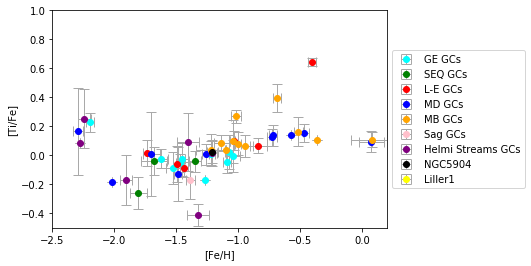

In [123]:
mask1 = (fe_h>-10)&(ti_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
ti_fe1 = ti_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(ti_fe1[np.where(gc_name1=='NGC6809')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC6121')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC6544')]),np.mean(ti_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(ti_fe1[np.where(gc_name1=='NGC6809')]),np.std(ti_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(ti_fe1[np.where(gc_name1=='NGC6121')]),np.std(ti_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(ti_fe1[np.where(gc_name1=='NGC6544')]),np.std(ti_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(ti_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(ti_fe1[np.where(gc_name1=='NGC362')]),np.mean(ti_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC1904')]),np.mean(ti_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC4147')]),np.mean(ti_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC6341')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(ti_fe1[np.where(gc_name1=='NGC6205')]),np.mean(ti_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(ti_fe1[np.where(gc_name1=='NGC362')]),np.std(ti_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(ti_fe1[np.where(gc_name1=='NGC1904')]),np.std(ti_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(ti_fe1[np.where(gc_name1=='NGC4147')]),np.std(ti_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(ti_fe1[np.where(gc_name1=='NGC6341')]),np.std(ti_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(ti_fe1[np.where(gc_name1=='NGC6205')]),np.std(ti_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(ti_fe1[np.where(gc_name1=='NGC5466')]),np.mean(ti_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(ti_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(ti_fe1[np.where(gc_name1=='NGC5466')]),np.std(ti_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(ti_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(ti_fe1[np.where(gc_name1=='NGC104')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC6218')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC6397')]),np.mean(ti_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC6656')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(ti_fe1[np.where(gc_name1=='Pal10')]),np.mean(ti_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(ti_fe1[np.where(gc_name1=='NGC6760')]),np.mean(ti_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(ti_fe1[np.where(gc_name1=='NGC104')]),np.std(ti_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(ti_fe1[np.where(gc_name1=='NGC6218')]),np.std(ti_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(ti_fe1[np.where(gc_name1=='NGC6397')]),np.std(ti_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(ti_fe1[np.where(gc_name1=='NGC6656')]),np.std(ti_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(ti_fe1[np.where(gc_name1=='Pal10')]),np.std(ti_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(ti_fe1[np.where(gc_name1=='NGC6760')]),np.std(ti_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(ti_fe1[np.where(gc_name1=='Terzan4')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(ti_fe1[np.where(gc_name1=='HP1')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC6388')]),np.mean(ti_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(ti_fe1[np.where(gc_name1=='NGC6522')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(ti_fe1[np.where(gc_name1=='NGC6723')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(ti_fe1[np.where(gc_name1=='NGC6540')]),np.mean(ti_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(ti_fe1[np.where(gc_name1=='Terzan4')]),np.std(ti_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(ti_fe1[np.where(gc_name1=='HP1')]),np.std(ti_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(ti_fe1[np.where(gc_name1=='NGC6388')]),np.std(ti_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(ti_fe1[np.where(gc_name1=='NGC6522')]),np.std(ti_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(ti_fe1[np.where(gc_name1=='NGC6723')]),np.std(ti_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(ti_fe1[np.where(gc_name1=='NGC6540')]),np.std(ti_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(ti_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(ti_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(ti_fe1[np.where(gc_name1=='NGC4590')]),np.mean(ti_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(ti_fe1[np.where(gc_name1=='NGC5024')]),np.mean(ti_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(ti_fe1[np.where(gc_name1=='NGC5272')]),np.mean(ti_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(ti_fe1[np.where(gc_name1=='NGC4590')]),np.std(ti_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(ti_fe1[np.where(gc_name1=='NGC5024')]),np.std(ti_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(ti_fe1[np.where(gc_name1=='NGC5272')]),np.std(ti_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(ti_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(ti_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(ti_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(ti_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[Ti/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.5,1.)
plt.show()

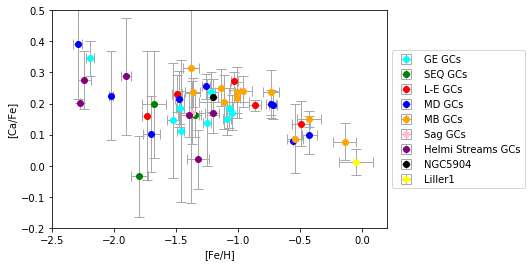

In [287]:
mask1 = (fe_h>-10)&(ca_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
ca_fe1 = ca_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(ca_fe1[np.where(gc_name1=='NGC6809')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6121')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6544')]),np.mean(ca_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(ca_fe1[np.where(gc_name1=='NGC6809')]),np.std(ca_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(ca_fe1[np.where(gc_name1=='NGC6121')]),np.std(ca_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6544')]),np.std(ca_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(ca_fe1[np.where(gc_name1=='NGC362')]),np.mean(ca_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC1904')]),np.mean(ca_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC4147')]),np.mean(ca_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6341')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(ca_fe1[np.where(gc_name1=='NGC6205')]),np.mean(ca_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(ca_fe1[np.where(gc_name1=='NGC362')]),np.std(ca_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(ca_fe1[np.where(gc_name1=='NGC1904')]),np.std(ca_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(ca_fe1[np.where(gc_name1=='NGC4147')]),np.std(ca_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(ca_fe1[np.where(gc_name1=='NGC6341')]),np.std(ca_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(ca_fe1[np.where(gc_name1=='NGC6205')]),np.std(ca_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(ca_fe1[np.where(gc_name1=='NGC5466')]),np.mean(ca_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(ca_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(ca_fe1[np.where(gc_name1=='NGC5466')]),np.std(ca_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(ca_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(ca_fe1[np.where(gc_name1=='NGC104')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6218')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6397')]),np.mean(ca_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6656')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(ca_fe1[np.where(gc_name1=='Pal10')]),np.mean(ca_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(ca_fe1[np.where(gc_name1=='NGC6760')]),np.mean(ca_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(ca_fe1[np.where(gc_name1=='NGC104')]),np.std(ca_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(ca_fe1[np.where(gc_name1=='NGC6218')]),np.std(ca_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6397')]),np.std(ca_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6656')]),np.std(ca_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(ca_fe1[np.where(gc_name1=='Pal10')]),np.std(ca_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(ca_fe1[np.where(gc_name1=='NGC6760')]),np.std(ca_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(ca_fe1[np.where(gc_name1=='Terzan4')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(ca_fe1[np.where(gc_name1=='HP1')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6388')]),np.mean(ca_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6522')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(ca_fe1[np.where(gc_name1=='NGC6723')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(ca_fe1[np.where(gc_name1=='NGC6540')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(ca_fe1[np.where(gc_name1=='Terzan4')]),np.std(ca_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(ca_fe1[np.where(gc_name1=='HP1')]),np.std(ca_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6388')]),np.std(ca_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6522')]),np.std(ca_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6723')]),np.std(ca_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(ca_fe1[np.where(gc_name1=='NGC6540')]),np.std(ca_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(ca_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(ca_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(ca_fe1[np.where(gc_name1=='NGC4590')]),np.mean(ca_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(ca_fe1[np.where(gc_name1=='NGC5024')]),np.mean(ca_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(ca_fe1[np.where(gc_name1=='NGC5272')]),np.mean(ca_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(ca_fe1[np.where(gc_name1=='NGC4590')]),np.std(ca_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(ca_fe1[np.where(gc_name1=='NGC5024')]),np.std(ca_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(ca_fe1[np.where(gc_name1=='NGC5272')]),np.std(ca_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(ca_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(ca_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(ca_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(ca_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[Ca/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.2,.5)
plt.show()

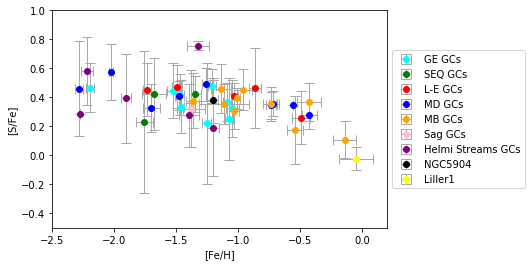

In [288]:
mask1 = (fe_h>-10)&(s_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
s_fe1 = s_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(s_fe1[np.where(gc_name1=='NGC6809')]),np.mean(s_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(s_fe1[np.where(gc_name1=='NGC6121')]),np.mean(s_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(s_fe1[np.where(gc_name1=='NGC6544')]),np.mean(s_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(s_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(s_fe1[np.where(gc_name1=='NGC6809')]),np.std(s_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(s_fe1[np.where(gc_name1=='NGC6121')]),np.std(s_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(s_fe1[np.where(gc_name1=='NGC6544')]),np.std(s_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(s_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(s_fe1[np.where(gc_name1=='NGC362')]),np.mean(s_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(s_fe1[np.where(gc_name1=='NGC1904')]),np.mean(s_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(s_fe1[np.where(gc_name1=='NGC4147')]),np.mean(s_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(s_fe1[np.where(gc_name1=='NGC6341')]),np.mean(s_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(s_fe1[np.where(gc_name1=='NGC6205')]),np.mean(s_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(s_fe1[np.where(gc_name1=='NGC362')]),np.std(s_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(s_fe1[np.where(gc_name1=='NGC1904')]),np.std(s_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(s_fe1[np.where(gc_name1=='NGC4147')]),np.std(s_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(s_fe1[np.where(gc_name1=='NGC6341')]),np.std(s_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(s_fe1[np.where(gc_name1=='NGC6205')]),np.std(s_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(s_fe1[np.where(gc_name1=='NGC5466')]),np.mean(s_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(s_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(s_fe1[np.where(gc_name1=='NGC5466')]),np.std(s_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(s_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(s_fe1[np.where(gc_name1=='NGC104')]),np.mean(s_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(s_fe1[np.where(gc_name1=='NGC6218')]),np.mean(s_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(s_fe1[np.where(gc_name1=='NGC6397')]),np.mean(s_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(s_fe1[np.where(gc_name1=='NGC6656')]),np.mean(s_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(s_fe1[np.where(gc_name1=='Pal10')]),np.mean(s_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(s_fe1[np.where(gc_name1=='NGC6760')]),np.mean(s_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(s_fe1[np.where(gc_name1=='NGC104')]),np.std(s_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(s_fe1[np.where(gc_name1=='NGC6218')]),np.std(s_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(s_fe1[np.where(gc_name1=='NGC6397')]),np.std(s_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(s_fe1[np.where(gc_name1=='NGC6656')]),np.std(s_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(s_fe1[np.where(gc_name1=='Pal10')]),np.std(s_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(s_fe1[np.where(gc_name1=='NGC6760')]),np.std(s_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(s_fe1[np.where(gc_name1=='Terzan4')]),np.mean(s_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(s_fe1[np.where(gc_name1=='HP1')]),np.mean(s_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(s_fe1[np.where(gc_name1=='NGC6388')]),np.mean(s_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(s_fe1[np.where(gc_name1=='NGC6522')]),np.mean(s_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(s_fe1[np.where(gc_name1=='NGC6723')]),np.mean(s_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(s_fe1[np.where(gc_name1=='NGC6540')]),np.mean(s_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(s_fe1[np.where(gc_name1=='Terzan4')]),np.std(s_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(s_fe1[np.where(gc_name1=='HP1')]),np.std(s_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(s_fe1[np.where(gc_name1=='NGC6388')]),np.std(s_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(s_fe1[np.where(gc_name1=='NGC6522')]),np.std(s_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(s_fe1[np.where(gc_name1=='NGC6723')]),np.std(s_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(s_fe1[np.where(gc_name1=='NGC6540')]),np.std(s_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(s_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(s_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(s_fe1[np.where(gc_name1=='NGC4590')]),np.mean(s_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(s_fe1[np.where(gc_name1=='NGC5024')]),np.mean(s_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(s_fe1[np.where(gc_name1=='NGC5272')]),np.mean(s_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(s_fe1[np.where(gc_name1=='NGC4590')]),np.std(s_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(s_fe1[np.where(gc_name1=='NGC5024')]),np.std(s_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(s_fe1[np.where(gc_name1=='NGC5272')]),np.std(s_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(s_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(s_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(s_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(s_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[S/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.5,1.)
plt.show()

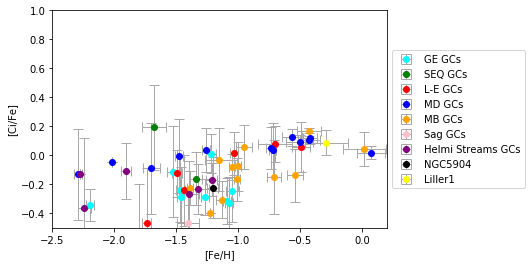

In [127]:
mask1 = (fe_h>-10)&(ci_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
ci_fe1 = ci_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(ci_fe1[np.where(gc_name1=='NGC6809')]),np.mean(ci_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(ci_fe1[np.where(gc_name1=='NGC6121')]),np.mean(ci_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(ci_fe1[np.where(gc_name1=='NGC6544')]),np.mean(ci_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(ci_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(ci_fe1[np.where(gc_name1=='NGC6809')]),np.std(ci_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(ci_fe1[np.where(gc_name1=='NGC6121')]),np.std(ci_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(ci_fe1[np.where(gc_name1=='NGC6544')]),np.std(ci_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(ci_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(ci_fe1[np.where(gc_name1=='NGC362')]),np.mean(ci_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(ci_fe1[np.where(gc_name1=='NGC1904')]),np.mean(ci_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(ci_fe1[np.where(gc_name1=='NGC4147')]),np.mean(ci_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(ci_fe1[np.where(gc_name1=='NGC6341')]),np.mean(ci_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(ci_fe1[np.where(gc_name1=='NGC6205')]),np.mean(ci_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(ci_fe1[np.where(gc_name1=='NGC362')]),np.std(ci_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(ci_fe1[np.where(gc_name1=='NGC1904')]),np.std(ci_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(ci_fe1[np.where(gc_name1=='NGC4147')]),np.std(ci_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(ci_fe1[np.where(gc_name1=='NGC6341')]),np.std(ci_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(ci_fe1[np.where(gc_name1=='NGC6205')]),np.std(ci_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(ci_fe1[np.where(gc_name1=='NGC5466')]),np.mean(ci_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(ci_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(ci_fe1[np.where(gc_name1=='NGC5466')]),np.std(ci_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(ci_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(ci_fe1[np.where(gc_name1=='NGC104')]),np.mean(ci_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(ci_fe1[np.where(gc_name1=='NGC6218')]),np.mean(ci_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(ci_fe1[np.where(gc_name1=='NGC6397')]),np.mean(ci_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(ci_fe1[np.where(gc_name1=='NGC6656')]),np.mean(ci_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(ci_fe1[np.where(gc_name1=='Pal10')]),np.mean(ci_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(ci_fe1[np.where(gc_name1=='NGC6760')]),np.mean(ci_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(ci_fe1[np.where(gc_name1=='NGC104')]),np.std(ci_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(ci_fe1[np.where(gc_name1=='NGC6218')]),np.std(ci_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(ci_fe1[np.where(gc_name1=='NGC6397')]),np.std(ci_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(ci_fe1[np.where(gc_name1=='NGC6656')]),np.std(ci_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(ci_fe1[np.where(gc_name1=='Pal10')]),np.std(ci_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(ci_fe1[np.where(gc_name1=='NGC6760')]),np.std(ci_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(ci_fe1[np.where(gc_name1=='Terzan4')]),np.mean(ci_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(ci_fe1[np.where(gc_name1=='HP1')]),np.mean(ci_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(ci_fe1[np.where(gc_name1=='NGC6388')]),np.mean(ci_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(ci_fe1[np.where(gc_name1=='NGC6522')]),np.mean(ci_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(ci_fe1[np.where(gc_name1=='NGC6723')]),np.mean(ci_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(ci_fe1[np.where(gc_name1=='NGC6540')]),np.mean(ci_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(ci_fe1[np.where(gc_name1=='Terzan4')]),np.std(ci_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(ci_fe1[np.where(gc_name1=='HP1')]),np.std(ci_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(ci_fe1[np.where(gc_name1=='NGC6388')]),np.std(ci_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(ci_fe1[np.where(gc_name1=='NGC6522')]),np.std(ci_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(ci_fe1[np.where(gc_name1=='NGC6723')]),np.std(ci_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(ci_fe1[np.where(gc_name1=='NGC6540')]),np.std(ci_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(ci_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(ci_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(ci_fe1[np.where(gc_name1=='NGC4590')]),np.mean(ci_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(ci_fe1[np.where(gc_name1=='NGC5024')]),np.mean(ci_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(ci_fe1[np.where(gc_name1=='NGC5272')]),np.mean(ci_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(ci_fe1[np.where(gc_name1=='NGC4590')]),np.std(ci_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(ci_fe1[np.where(gc_name1=='NGC5024')]),np.std(ci_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(ci_fe1[np.where(gc_name1=='NGC5272')]),np.std(ci_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(ci_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(ci_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(ci_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(ci_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[Ci/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.5,1.)
plt.show()

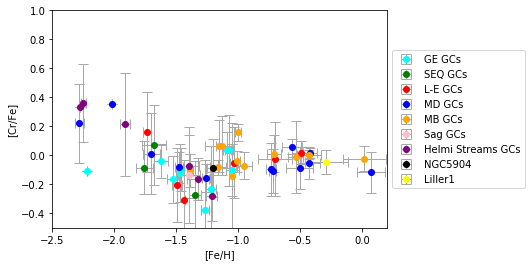

In [128]:
mask1 = (fe_h>-10)&(cr_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
cr_fe1 = cr_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(cr_fe1[np.where(gc_name1=='NGC6809')]),np.mean(cr_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(cr_fe1[np.where(gc_name1=='NGC6121')]),np.mean(cr_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(cr_fe1[np.where(gc_name1=='NGC6544')]),np.mean(cr_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(cr_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(cr_fe1[np.where(gc_name1=='NGC6809')]),np.std(cr_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(cr_fe1[np.where(gc_name1=='NGC6121')]),np.std(cr_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(cr_fe1[np.where(gc_name1=='NGC6544')]),np.std(cr_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(cr_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(cr_fe1[np.where(gc_name1=='NGC362')]),np.mean(cr_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(cr_fe1[np.where(gc_name1=='NGC1904')]),np.mean(cr_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(cr_fe1[np.where(gc_name1=='NGC4147')]),np.mean(cr_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(cr_fe1[np.where(gc_name1=='NGC6341')]),np.mean(cr_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(cr_fe1[np.where(gc_name1=='NGC6205')]),np.mean(cr_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(cr_fe1[np.where(gc_name1=='NGC362')]),np.std(cr_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(cr_fe1[np.where(gc_name1=='NGC1904')]),np.std(cr_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(cr_fe1[np.where(gc_name1=='NGC4147')]),np.std(cr_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(cr_fe1[np.where(gc_name1=='NGC6341')]),np.std(cr_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(cr_fe1[np.where(gc_name1=='NGC6205')]),np.std(cr_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(cr_fe1[np.where(gc_name1=='NGC5466')]),np.mean(cr_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(cr_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(cr_fe1[np.where(gc_name1=='NGC5466')]),np.std(cr_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(cr_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(cr_fe1[np.where(gc_name1=='NGC104')]),np.mean(cr_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(cr_fe1[np.where(gc_name1=='NGC6218')]),np.mean(cr_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(cr_fe1[np.where(gc_name1=='NGC6397')]),np.mean(cr_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(cr_fe1[np.where(gc_name1=='NGC6656')]),np.mean(cr_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(cr_fe1[np.where(gc_name1=='Pal10')]),np.mean(cr_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(cr_fe1[np.where(gc_name1=='NGC6760')]),np.mean(cr_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(cr_fe1[np.where(gc_name1=='NGC104')]),np.std(cr_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(cr_fe1[np.where(gc_name1=='NGC6218')]),np.std(cr_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(cr_fe1[np.where(gc_name1=='NGC6397')]),np.std(cr_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(cr_fe1[np.where(gc_name1=='NGC6656')]),np.std(cr_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(cr_fe1[np.where(gc_name1=='Pal10')]),np.std(cr_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(cr_fe1[np.where(gc_name1=='NGC6760')]),np.std(cr_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(cr_fe1[np.where(gc_name1=='Terzan4')]),np.mean(cr_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(cr_fe1[np.where(gc_name1=='HP1')]),np.mean(cr_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(cr_fe1[np.where(gc_name1=='NGC6388')]),np.mean(cr_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(cr_fe1[np.where(gc_name1=='NGC6522')]),np.mean(cr_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(cr_fe1[np.where(gc_name1=='NGC6723')]),np.mean(cr_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(cr_fe1[np.where(gc_name1=='NGC6540')]),np.mean(cr_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(cr_fe1[np.where(gc_name1=='Terzan4')]),np.std(cr_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(cr_fe1[np.where(gc_name1=='HP1')]),np.std(cr_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(cr_fe1[np.where(gc_name1=='NGC6388')]),np.std(cr_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(cr_fe1[np.where(gc_name1=='NGC6522')]),np.std(cr_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(cr_fe1[np.where(gc_name1=='NGC6723')]),np.std(cr_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(cr_fe1[np.where(gc_name1=='NGC6540')]),np.std(cr_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(cr_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(cr_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(cr_fe1[np.where(gc_name1=='NGC4590')]),np.mean(cr_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(cr_fe1[np.where(gc_name1=='NGC5024')]),np.mean(cr_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(cr_fe1[np.where(gc_name1=='NGC5272')]),np.mean(cr_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(cr_fe1[np.where(gc_name1=='NGC4590')]),np.std(cr_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(cr_fe1[np.where(gc_name1=='NGC5024')]),np.std(cr_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(cr_fe1[np.where(gc_name1=='NGC5272')]),np.std(cr_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(cr_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(cr_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(cr_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(cr_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[Cr/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.5,1.)
plt.show()

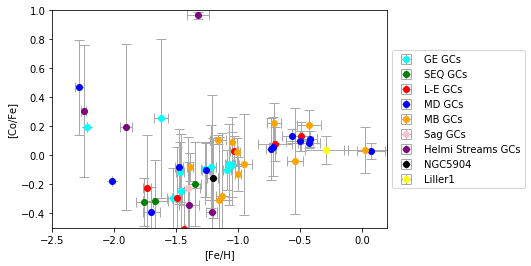

In [129]:
mask1 = (fe_h>-10)&(co_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
co_fe1 = co_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(co_fe1[np.where(gc_name1=='NGC6809')]),np.mean(co_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(co_fe1[np.where(gc_name1=='NGC6121')]),np.mean(co_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(co_fe1[np.where(gc_name1=='NGC6544')]),np.mean(co_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(co_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(co_fe1[np.where(gc_name1=='NGC6809')]),np.std(co_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(co_fe1[np.where(gc_name1=='NGC6121')]),np.std(co_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(co_fe1[np.where(gc_name1=='NGC6544')]),np.std(co_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(co_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(co_fe1[np.where(gc_name1=='NGC362')]),np.mean(co_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(co_fe1[np.where(gc_name1=='NGC1904')]),np.mean(co_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(co_fe1[np.where(gc_name1=='NGC4147')]),np.mean(co_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(co_fe1[np.where(gc_name1=='NGC6341')]),np.mean(co_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(co_fe1[np.where(gc_name1=='NGC6205')]),np.mean(co_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(co_fe1[np.where(gc_name1=='NGC362')]),np.std(co_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(co_fe1[np.where(gc_name1=='NGC1904')]),np.std(co_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(co_fe1[np.where(gc_name1=='NGC4147')]),np.std(co_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(co_fe1[np.where(gc_name1=='NGC6341')]),np.std(co_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(co_fe1[np.where(gc_name1=='NGC6205')]),np.std(co_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(co_fe1[np.where(gc_name1=='NGC5466')]),np.mean(co_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(co_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(co_fe1[np.where(gc_name1=='NGC5466')]),np.std(co_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(co_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(co_fe1[np.where(gc_name1=='NGC104')]),np.mean(co_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(co_fe1[np.where(gc_name1=='NGC6218')]),np.mean(co_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(co_fe1[np.where(gc_name1=='NGC6397')]),np.mean(co_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(co_fe1[np.where(gc_name1=='NGC6656')]),np.mean(co_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(co_fe1[np.where(gc_name1=='Pal10')]),np.mean(co_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(co_fe1[np.where(gc_name1=='NGC6760')]),np.mean(co_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(co_fe1[np.where(gc_name1=='NGC104')]),np.std(co_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(co_fe1[np.where(gc_name1=='NGC6218')]),np.std(co_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(co_fe1[np.where(gc_name1=='NGC6397')]),np.std(co_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(co_fe1[np.where(gc_name1=='NGC6656')]),np.std(co_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(co_fe1[np.where(gc_name1=='Pal10')]),np.std(co_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(co_fe1[np.where(gc_name1=='NGC6760')]),np.std(co_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(co_fe1[np.where(gc_name1=='Terzan4')]),np.mean(co_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(co_fe1[np.where(gc_name1=='HP1')]),np.mean(co_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(co_fe1[np.where(gc_name1=='NGC6388')]),np.mean(co_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(co_fe1[np.where(gc_name1=='NGC6522')]),np.mean(co_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(co_fe1[np.where(gc_name1=='NGC6723')]),np.mean(co_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(co_fe1[np.where(gc_name1=='NGC6540')]),np.mean(co_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(co_fe1[np.where(gc_name1=='Terzan4')]),np.std(co_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(co_fe1[np.where(gc_name1=='HP1')]),np.std(co_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(co_fe1[np.where(gc_name1=='NGC6388')]),np.std(co_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(co_fe1[np.where(gc_name1=='NGC6522')]),np.std(co_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(co_fe1[np.where(gc_name1=='NGC6723')]),np.std(co_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(co_fe1[np.where(gc_name1=='NGC6540')]),np.std(co_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(co_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(co_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(co_fe1[np.where(gc_name1=='NGC4590')]),np.mean(co_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(co_fe1[np.where(gc_name1=='NGC5024')]),np.mean(co_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(co_fe1[np.where(gc_name1=='NGC5272')]),np.mean(co_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(co_fe1[np.where(gc_name1=='NGC4590')]),np.std(co_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(co_fe1[np.where(gc_name1=='NGC5024')]),np.std(co_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(co_fe1[np.where(gc_name1=='NGC5272')]),np.std(co_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(co_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(co_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(co_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(co_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[Co/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.5,1.)
plt.show()

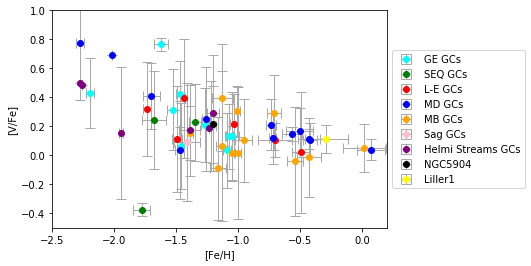

In [130]:
mask1 = (fe_h>-10)&(v_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
v_fe1 = v_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(v_fe1[np.where(gc_name1=='NGC6809')]),np.mean(v_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(v_fe1[np.where(gc_name1=='NGC6121')]),np.mean(v_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(v_fe1[np.where(gc_name1=='NGC6544')]),np.mean(v_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(v_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(v_fe1[np.where(gc_name1=='NGC6809')]),np.std(v_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(v_fe1[np.where(gc_name1=='NGC6121')]),np.std(v_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(v_fe1[np.where(gc_name1=='NGC6544')]),np.std(v_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(v_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(v_fe1[np.where(gc_name1=='NGC362')]),np.mean(v_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(v_fe1[np.where(gc_name1=='NGC1904')]),np.mean(v_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(v_fe1[np.where(gc_name1=='NGC4147')]),np.mean(v_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(v_fe1[np.where(gc_name1=='NGC6341')]),np.mean(v_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(v_fe1[np.where(gc_name1=='NGC6205')]),np.mean(v_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(v_fe1[np.where(gc_name1=='NGC362')]),np.std(v_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(v_fe1[np.where(gc_name1=='NGC1904')]),np.std(v_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(v_fe1[np.where(gc_name1=='NGC4147')]),np.std(v_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(v_fe1[np.where(gc_name1=='NGC6341')]),np.std(v_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(v_fe1[np.where(gc_name1=='NGC6205')]),np.std(v_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(v_fe1[np.where(gc_name1=='NGC5466')]),np.mean(v_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(v_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(v_fe1[np.where(gc_name1=='NGC5466')]),np.std(v_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(v_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(v_fe1[np.where(gc_name1=='NGC104')]),np.mean(v_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(v_fe1[np.where(gc_name1=='NGC6218')]),np.mean(v_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(v_fe1[np.where(gc_name1=='NGC6397')]),np.mean(v_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(v_fe1[np.where(gc_name1=='NGC6656')]),np.mean(v_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(v_fe1[np.where(gc_name1=='Pal10')]),np.mean(v_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(v_fe1[np.where(gc_name1=='NGC6760')]),np.mean(v_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(v_fe1[np.where(gc_name1=='NGC104')]),np.std(v_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(v_fe1[np.where(gc_name1=='NGC6218')]),np.std(v_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(v_fe1[np.where(gc_name1=='NGC6397')]),np.std(v_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(v_fe1[np.where(gc_name1=='NGC6656')]),np.std(v_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(v_fe1[np.where(gc_name1=='Pal10')]),np.std(v_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(v_fe1[np.where(gc_name1=='NGC6760')]),np.std(v_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(v_fe1[np.where(gc_name1=='Terzan4')]),np.mean(v_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(v_fe1[np.where(gc_name1=='HP1')]),np.mean(v_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(v_fe1[np.where(gc_name1=='NGC6388')]),np.mean(v_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(v_fe1[np.where(gc_name1=='NGC6522')]),np.mean(v_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(v_fe1[np.where(gc_name1=='NGC6723')]),np.mean(v_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(v_fe1[np.where(gc_name1=='NGC6540')]),np.mean(v_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(v_fe1[np.where(gc_name1=='Terzan4')]),np.std(v_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(v_fe1[np.where(gc_name1=='HP1')]),np.std(v_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(v_fe1[np.where(gc_name1=='NGC6388')]),np.std(v_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(v_fe1[np.where(gc_name1=='NGC6522')]),np.std(v_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(v_fe1[np.where(gc_name1=='NGC6723')]),np.std(v_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(v_fe1[np.where(gc_name1=='NGC6540')]),np.std(v_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(v_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(v_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(v_fe1[np.where(gc_name1=='NGC4590')]),np.mean(v_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(v_fe1[np.where(gc_name1=='NGC5024')]),np.mean(v_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(v_fe1[np.where(gc_name1=='NGC5272')]),np.mean(v_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(v_fe1[np.where(gc_name1=='NGC4590')]),np.std(v_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(v_fe1[np.where(gc_name1=='NGC5024')]),np.std(v_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(v_fe1[np.where(gc_name1=='NGC5272')]),np.std(v_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(v_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(v_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(v_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(v_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[V/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.5,1.)
plt.show()

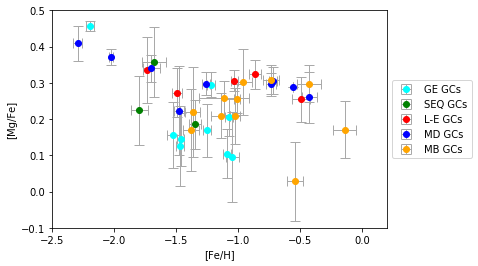

In [303]:
mask1 = (fe_h>-10)&(mg_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
mg_fe1 = mg_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(mg_fe1[np.where(gc_name1=='NGC6809')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6121')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6544')]),np.mean(mg_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(mg_fe1[np.where(gc_name1=='NGC6809')]),np.std(mg_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(mg_fe1[np.where(gc_name1=='NGC6121')]),np.std(mg_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6544')]),np.std(mg_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(mg_fe1[np.where(gc_name1=='NGC362')]),np.mean(mg_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC1904')]),np.mean(mg_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC4147')]),np.mean(mg_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6341')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(mg_fe1[np.where(gc_name1=='NGC6205')]),np.mean(mg_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(mg_fe1[np.where(gc_name1=='NGC362')]),np.std(mg_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(mg_fe1[np.where(gc_name1=='NGC1904')]),np.std(mg_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(mg_fe1[np.where(gc_name1=='NGC4147')]),np.std(mg_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(mg_fe1[np.where(gc_name1=='NGC6341')]),np.std(mg_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(mg_fe1[np.where(gc_name1=='NGC6205')]),np.std(mg_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(mg_fe1[np.where(gc_name1=='NGC5466')]),np.mean(mg_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(mg_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(mg_fe1[np.where(gc_name1=='NGC5466')]),np.std(mg_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(mg_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(mg_fe1[np.where(gc_name1=='NGC104')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6218')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6397')]),np.mean(mg_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6656')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(mg_fe1[np.where(gc_name1=='Pal10')]),np.mean(mg_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(mg_fe1[np.where(gc_name1=='NGC6760')]),np.mean(mg_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(mg_fe1[np.where(gc_name1=='NGC104')]),np.std(mg_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(mg_fe1[np.where(gc_name1=='NGC6218')]),np.std(mg_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6397')]),np.std(mg_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6656')]),np.std(mg_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(mg_fe1[np.where(gc_name1=='Pal10')]),np.std(mg_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(mg_fe1[np.where(gc_name1=='NGC6760')]),np.std(mg_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(mg_fe1[np.where(gc_name1=='Terzan4')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(mg_fe1[np.where(gc_name1=='HP1')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6388')]),np.mean(mg_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6522')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(mg_fe1[np.where(gc_name1=='NGC6723')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(mg_fe1[np.where(gc_name1=='NGC6540')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(mg_fe1[np.where(gc_name1=='Terzan4')]),np.std(mg_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(mg_fe1[np.where(gc_name1=='HP1')]),np.std(mg_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6388')]),np.std(mg_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6522')]),np.std(mg_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6723')]),np.std(mg_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(mg_fe1[np.where(gc_name1=='NGC6540')]),np.std(mg_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')]),np.mean(fe_h1[np.where(gc_name1=='Arp2')])]
ys_sag = [np.mean(mg_fe1[np.where(gc_name1=='NGC6715')]),np.mean(mg_fe1[np.where(gc_name1=='Arp2')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')]),np.std(fe_h1[np.where(gc_name1=='Arp2')])]
yerrs_sag = [np.std(mg_fe1[np.where(gc_name1=='NGC6715')]),np.std(mg_fe1[np.where(gc_name1=='Arp2')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(mg_fe1[np.where(gc_name1=='NGC4590')]),np.mean(mg_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(mg_fe1[np.where(gc_name1=='NGC5024')]),np.mean(mg_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(mg_fe1[np.where(gc_name1=='NGC5272')]),np.mean(mg_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(mg_fe1[np.where(gc_name1=='NGC4590')]),np.std(mg_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(mg_fe1[np.where(gc_name1=='NGC5024')]),np.std(mg_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(mg_fe1[np.where(gc_name1=='NGC5272')]),np.std(mg_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(mg_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(mg_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(mg_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(mg_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
# plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Helmi Streams GCs')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='NGC5904')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
plt.ylabel('[Mg/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.1,.5)
plt.show()

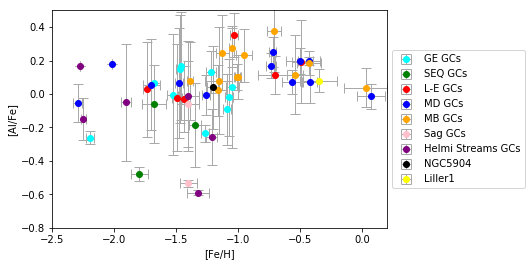

In [171]:
mask1 = (fe_h>-10)&(al_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
al_fe1 = al_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(al_fe1[np.where(gc_name1=='NGC6809')]),np.mean(al_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6121')]),np.mean(al_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6544')]),np.mean(al_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(al_fe1[np.where(gc_name1=='NGC6809')]),np.std(al_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(al_fe1[np.where(gc_name1=='NGC6121')]),np.std(al_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(al_fe1[np.where(gc_name1=='NGC6544')]),np.std(al_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(al_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(al_fe1[np.where(gc_name1=='NGC362')]),np.mean(al_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC1904')]),np.mean(al_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC4147')]),np.mean(al_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6341')]),np.mean(al_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(al_fe1[np.where(gc_name1=='NGC6205')]),np.mean(al_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(al_fe1[np.where(gc_name1=='NGC362')]),np.std(al_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(al_fe1[np.where(gc_name1=='NGC1904')]),np.std(al_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(al_fe1[np.where(gc_name1=='NGC4147')]),np.std(al_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(al_fe1[np.where(gc_name1=='NGC6341')]),np.std(al_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(al_fe1[np.where(gc_name1=='NGC6205')]),np.std(al_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(al_fe1[np.where(gc_name1=='NGC5466')]),np.mean(al_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(al_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(al_fe1[np.where(gc_name1=='NGC5466')]),np.std(al_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(al_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(al_fe1[np.where(gc_name1=='NGC104')]),np.mean(al_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6218')]),np.mean(al_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6397')]),np.mean(al_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6656')]),np.mean(al_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(al_fe1[np.where(gc_name1=='Pal10')]),np.mean(al_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(al_fe1[np.where(gc_name1=='NGC6760')]),np.mean(al_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(al_fe1[np.where(gc_name1=='NGC104')]),np.std(al_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(al_fe1[np.where(gc_name1=='NGC6218')]),np.std(al_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(al_fe1[np.where(gc_name1=='NGC6397')]),np.std(al_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(al_fe1[np.where(gc_name1=='NGC6656')]),np.std(al_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(al_fe1[np.where(gc_name1=='Pal10')]),np.std(al_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(al_fe1[np.where(gc_name1=='NGC6760')]),np.std(al_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(al_fe1[np.where(gc_name1=='Terzan4')]),np.mean(al_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(al_fe1[np.where(gc_name1=='HP1')]),np.mean(al_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6388')]),np.mean(al_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6522')]),np.mean(al_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(al_fe1[np.where(gc_name1=='NGC6723')]),np.mean(al_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(al_fe1[np.where(gc_name1=='NGC6540')]),np.mean(al_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(al_fe1[np.where(gc_name1=='Terzan4')]),np.std(al_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(al_fe1[np.where(gc_name1=='HP1')]),np.std(al_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(al_fe1[np.where(gc_name1=='NGC6388')]),np.std(al_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(al_fe1[np.where(gc_name1=='NGC6522')]),np.std(al_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(al_fe1[np.where(gc_name1=='NGC6723')]),np.std(al_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(al_fe1[np.where(gc_name1=='NGC6540')]),np.std(al_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')]),np.mean(fe_h1[np.where(gc_name1=='Arp2')])]
ys_sag = [np.mean(al_fe1[np.where(gc_name1=='NGC6715')]),np.mean(al_fe1[np.where(gc_name1=='Arp2')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')]),np.std(fe_h1[np.where(gc_name1=='Arp2')])]
yerrs_sag = [np.std(al_fe1[np.where(gc_name1=='NGC6715')]),np.std(al_fe1[np.where(gc_name1=='Arp2')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(al_fe1[np.where(gc_name1=='NGC4590')]),np.mean(al_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(al_fe1[np.where(gc_name1=='NGC5024')]),np.mean(al_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(al_fe1[np.where(gc_name1=='NGC5272')]),np.mean(al_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(al_fe1[np.where(gc_name1=='NGC4590')]),np.std(al_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(al_fe1[np.where(gc_name1=='NGC5024')]),np.std(al_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(al_fe1[np.where(gc_name1=='NGC5272')]),np.std(al_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(al_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(al_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(al_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(al_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[Al/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-0.8,.5)
getplt.show()

In [310]:
mask1 = (fe_h>-10)&(o_fe>-10)&(si_fe>-10)&(mg_fe>-10)&(ca_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
o_fe1 = o_fe[mask1]
mg_fe1 = mg_fe[mask1]
ca_fe1 = ca_fe[mask1]
si_fe1 = si_fe[mask1]
gc_name1 = gc_name[mask1]

# get the values of the GCs associated to each subgroup, to then later plot the trend.
alphas_hel = np.hstack((np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC4590')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Rup106')]),\
       np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5024')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5053')]),\
       np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5272')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Pal5')])))
print(alphas_hel)
fehs_hel =np.hstack((np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])))
print(fehs_hel)

alphas_ge = np.hstack((np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC362')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC1851')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC1904')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC2808')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC4147')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6229')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6341')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC288')]),\
    np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6205')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC7089')])))
print(alphas_ge)
fehs_ge =np.hstack((np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])))
print(fehs_ge)

fehs_seq =np.hstack((np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])))
print(fehs_seq)
alphas_seq = np.hstack((np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC3201')]),\
         np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5139')])))
print(alphas_seq)

xpoly_hel,ypoly_hel, coeffs_hel,poly_hel = fit_func(fehs_hel,alphas_hel,2)
xpoly_ge,ypoly_ge, coeffs_ge,poly_ge = fit_func(fehs_ge,alphas_ge,2)
xpoly_seq,ypoly_seq, coeffs_seq,poly_seq = fit_func(fehs_seq,alphas_seq,2)

[0.32639673 0.00733237 0.2845662  0.28151938 0.15237246 0.1630718 ]
[-2.2424614 -1.3272616 -1.9080162 -2.2752616 -1.4009026 -1.2078615]
[0.12856185 0.17488937 0.15609208 0.14285731        nan 0.18097241
 0.3960724  0.29106772 0.16228579 0.15730196]
[-1.0937653 -1.0798657 -1.5253462 -1.0510974        nan -1.2214365
 -2.1970115 -1.2558776 -1.4706222 -1.464123 ]
[-1.3468778 -1.6813524]
[0.18213318 0.29756683]


LinAlgError: SVD did not converge in Linear Least Squares

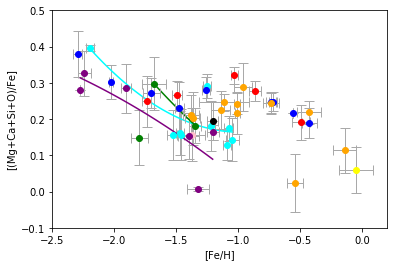

In [311]:
mask1 = (fe_h>-10)&(o_fe>-10)&(si_fe>-10)&(mg_fe>-10)&(ca_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
o_fe1 = o_fe[mask1]
mg_fe1 = mg_fe[mask1]
ca_fe1 = ca_fe[mask1]
si_fe1 = si_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6809')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6254')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6121')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6441')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6544')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Pal6')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6809')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6254')]),\
     np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6121')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6441')]),\
        np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6544')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Pal6')]),\
        np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC362')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC1851')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC1904')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC2808')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC4147')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6229')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6341')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC288')]),\
    np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6205')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC362')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC1851')]),\
     np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC1904')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC2808')]),\
    np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC4147')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6229')]),\
      np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6341')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC288')]),\
           np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6205')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5466')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC3201')]),\
         np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5466')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC3201')]),\
            np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC104')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6352')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6218')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6838')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6397')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC7078')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6656')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6752')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Pal10')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='IC1276')]),\
        np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6760')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC104')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6352')]),\
     np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6218')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6838')]),\
        np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6397')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC7078')]),\
        np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6656')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6752')]),\
        np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Pal10')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='IC1276')]),\
           np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6760')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Terzan4')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6171')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='HP1')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6380')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6388')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Terzan9')]),\
     np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6522')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6539')]),\
              np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6723')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6642')]),\
        np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6540')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Terzan4')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6171')]),\
     np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='HP1')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6380')]),\
        np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6388')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Terzan9')]),\
        np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6522')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6539')]),\
        np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6723')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6642')]),\
           np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6540')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')]),np.mean(fe_h1[np.where(gc_name1=='Arp2')])]
ys_sag = [np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6715')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Arp2')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')]),np.std(fe_h1[np.where(gc_name1=='Arp2')])]
yerrs_sag = [np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC6715')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Arp2')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC4590')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Rup106')]),\
       np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5024')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5053')]),\
       np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5272')]),np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC4590')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Rup106')]),\
          np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5024')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5053')]),\
          np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5272')]),np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(((o_fe1+si_fe1+mg_fe1+ca_fe1)/4)[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.plot(xpoly_ge,ypoly_ge,'-',color='cyan')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.plot(xpoly_seq,ypoly_seq,'-',color='green')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.plot(xpoly_hel,ypoly_hel,'-',color='purple')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[(Mg+Ca+Si+O)/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='center right')
plt.xlim(-2.5,0.2)
plt.ylim(-.1,0.5)
plt.show()

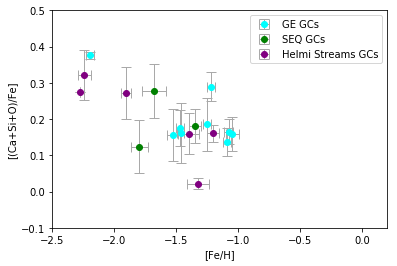

In [312]:
mask1 = (fe_h>-10)&(o_fe>-10)&(si_fe>-10)&(ca_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
o_fe1 = o_fe[mask1]
ca_fe1 = ca_fe[mask1]
si_fe1 = si_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6809')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6254')]),\
     np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6121')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6441')]),\
     np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6544')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Pal6')]),\
     np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6809')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6254')]),\
     np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6121')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6441')]),\
        np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6544')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Pal6')]),\
        np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC362')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC1851')]),\
     np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC1904')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC2808')]),\
     np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC4147')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC288')]),\
     np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6341')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6229')]),\
    np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6205')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC362')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC1851')]),\
     np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC1904')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC2808')]),\
    np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC4147')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC288')]),\
      np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6341')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6229')]),\
           np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6205')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC5466')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC3201')]),\
         np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC5466')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC3201')]),\
            np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC104')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6352')]),\
     np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6218')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6838')]),\
     np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6397')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC7078')]),\
     np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6656')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6752')]),\
     np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Pal10')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='IC1276')]),\
        np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6760')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC104')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6352')]),\
     np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6218')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6838')]),\
        np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6397')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC7078')]),\
        np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6656')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6752')]),\
        np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Pal10')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='IC1276')]),\
           np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6760')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Terzan4')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6171')]),\
     np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='HP1')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6380')]),\
     np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6388')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Terzan9')]),\
     np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6522')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6539')]),\
              np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6723')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6642')]),\
        np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6540')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Terzan4')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6171')]),\
     np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='HP1')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6380')]),\
        np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6388')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Terzan9')]),\
        np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6522')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6539')]),\
        np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6723')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6642')]),\
           np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6540')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')]),np.mean(fe_h1[np.where(gc_name1=='Arp2')])]
ys_sag = [np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6715')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Arp2')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')]),np.std(fe_h1[np.where(gc_name1=='Arp2')])]
yerrs_sag = [np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC6715')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Arp2')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC4590')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Rup106')]),\
       np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC5024')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC5053')]),\
       np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC5272')]),np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC4590')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Rup106')]),\
          np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC5024')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC5053')]),\
          np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC5272')]),np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(((o_fe1+si_fe1+ca_fe1)/3)[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
# plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='MD GCs')
# plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='MB GCs')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='NGC5904')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
plt.ylabel('[(Ca+Si+O)/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper right')
plt.xlim(-2.5,0.2)
plt.ylim(-.1,.5)
plt.show()

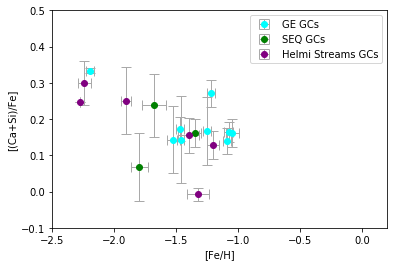

In [306]:
mask1 = (fe_h>-10)&(si_fe>-10)&(ca_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
o_fe1 = o_fe[mask1]
ca_fe1 = ca_fe[mask1]
si_fe1 = si_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6809')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6254')]),\
     np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6121')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6441')]),\
     np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6544')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Pal6')]),\
     np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6809')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6254')]),\
     np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6121')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6441')]),\
        np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6544')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Pal6')]),\
        np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC362')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC1851')]),\
     np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC1904')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC2808')]),\
     np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC4147')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC288')]),\
     np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6341')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6229')]),\
    np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6205')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC362')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC1851')]),\
     np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC1904')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC2808')]),\
    np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC4147')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC288')]),\
      np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6341')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6229')]),\
           np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6205')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5466')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC3201')]),\
         np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5466')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC3201')]),\
            np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC104')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6352')]),\
     np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6218')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6838')]),\
     np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6397')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC7078')]),\
     np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6656')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6752')]),\
     np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Pal10')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='IC1276')]),\
        np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6760')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC104')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6352')]),\
     np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6218')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6838')]),\
        np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6397')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC7078')]),\
        np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6656')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6752')]),\
        np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Pal10')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='IC1276')]),\
           np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6760')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Terzan4')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6171')]),\
     np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='HP1')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6380')]),\
     np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6388')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Terzan9')]),\
     np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6522')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6539')]),\
              np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6723')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6642')]),\
        np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6540')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Terzan4')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6171')]),\
     np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='HP1')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6380')]),\
        np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6388')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Terzan9')]),\
        np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6522')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6539')]),\
        np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6723')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6642')]),\
           np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6540')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')]),np.mean(fe_h1[np.where(gc_name1=='Arp2')])]
ys_sag = [np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6715')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Arp2')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')]),np.std(fe_h1[np.where(gc_name1=='Arp2')])]
yerrs_sag = [np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6715')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Arp2')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC4590')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Rup106')]),\
       np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5024')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5053')]),\
       np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5272')]),np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC4590')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Rup106')]),\
          np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5024')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5053')]),\
          np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5272')]),np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(((si_fe1+ca_fe1)/2)[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
# plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='MD GCs')
# plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='MB GCs')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='NGC5904')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
plt.ylabel('[(Ca+Si)/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper right')
plt.xlim(-2.5,0.2)
plt.ylim(-.1,.5)
plt.show()

In [144]:
# set the path
path = '/Users/qpasa/Desktop/PhD/Data/APOGEE'
folder = '/DR16/'
file = 'GC_DR16_ultimo_P1s' #merged tables from DR12 and DR14 using APOGEE ID

# read in the merged data2 table
tb = fits.open(path+folder+file)
# select the data2
data2 = tb[1].data #extracts the numeric bit of the data2

# read in the data2
fe_h = data2.field('FE_H')
mg_fe = data2.field('MG_FE')
al_fe = data2.field('AL_FE')
k_fe = data2.field('K_FE')
ni_fe = data2.field('NI_FE')
o_fe = data2.field('O_FE')
si_fe = data2.field('SI_FE')
v_fe = data2.field('V_FE')
c_fe = data2.field('C_FE')
s_fe = data2.field('S_FE')
n_fe = data2.field('N_FE')
mn_fe = data2.field('MN_FE')
co_fe = data2.field('CO_FE')
p_fe = data2.field('P_FE')
ti_fe = data2.field('TI_FE')
cu_fe = data2.field('CU_FE')
ce_fe = data2.field('CE_FE')
ci_fe = data2.field('CI_FE')
cr_fe = data2.field('CR_FE')
ca_fe = data2.field('CA_FE')
na_fe = data2.field('NA_FE')
Teff = data2.field('TEFF')
logg = data2.field('LOGG')
gc_name = data2.field('gc_name')
glat = data2.field('GLAT') #galactic latitude (a.k.a |b|)
glon = data2.field('GLON') #galactic longitude (a.k.a l)

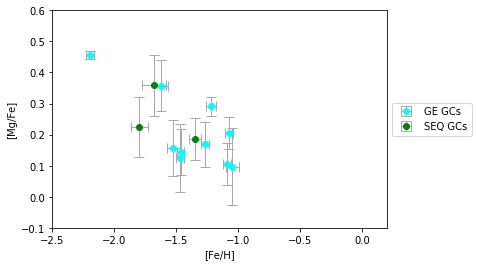

In [200]:
mask1 = (fe_h>-10)&(mg_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
mg_fe1 = mg_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(mg_fe1[np.where(gc_name1=='NGC6809')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6121')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6544')]),np.mean(mg_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(mg_fe1[np.where(gc_name1=='NGC6809')]),np.std(mg_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(mg_fe1[np.where(gc_name1=='NGC6121')]),np.std(mg_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6544')]),np.std(mg_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(mg_fe1[np.where(gc_name1=='NGC362')]),np.mean(mg_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC1904')]),np.mean(mg_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC4147')]),np.mean(mg_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6341')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(mg_fe1[np.where(gc_name1=='NGC6205')]),np.mean(mg_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(mg_fe1[np.where(gc_name1=='NGC362')]),np.std(mg_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(mg_fe1[np.where(gc_name1=='NGC1904')]),np.std(mg_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(mg_fe1[np.where(gc_name1=='NGC4147')]),np.std(mg_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(mg_fe1[np.where(gc_name1=='NGC6341')]),np.std(mg_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(mg_fe1[np.where(gc_name1=='NGC6205')]),np.std(mg_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(mg_fe1[np.where(gc_name1=='NGC5466')]),np.mean(mg_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(mg_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(mg_fe1[np.where(gc_name1=='NGC5466')]),np.std(mg_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(mg_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(mg_fe1[np.where(gc_name1=='NGC104')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6218')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6397')]),np.mean(mg_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6656')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(mg_fe1[np.where(gc_name1=='Pal10')]),np.mean(mg_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(mg_fe1[np.where(gc_name1=='NGC6760')]),np.mean(mg_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(mg_fe1[np.where(gc_name1=='NGC104')]),np.std(mg_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(mg_fe1[np.where(gc_name1=='NGC6218')]),np.std(mg_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6397')]),np.std(mg_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6656')]),np.std(mg_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(mg_fe1[np.where(gc_name1=='Pal10')]),np.std(mg_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(mg_fe1[np.where(gc_name1=='NGC6760')]),np.std(mg_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(mg_fe1[np.where(gc_name1=='Terzan4')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(mg_fe1[np.where(gc_name1=='HP1')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6388')]),np.mean(mg_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6522')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(mg_fe1[np.where(gc_name1=='NGC6723')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(mg_fe1[np.where(gc_name1=='NGC6540')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(mg_fe1[np.where(gc_name1=='Terzan4')]),np.std(mg_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(mg_fe1[np.where(gc_name1=='HP1')]),np.std(mg_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6388')]),np.std(mg_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6522')]),np.std(mg_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6723')]),np.std(mg_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(mg_fe1[np.where(gc_name1=='NGC6540')]),np.std(mg_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(mg_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(mg_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(mg_fe1[np.where(gc_name1=='NGC4590')]),np.mean(mg_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(mg_fe1[np.where(gc_name1=='NGC5024')]),np.mean(mg_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(mg_fe1[np.where(gc_name1=='NGC5272')]),np.mean(mg_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(mg_fe1[np.where(gc_name1=='NGC4590')]),np.std(mg_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(mg_fe1[np.where(gc_name1=='NGC5024')]),np.std(mg_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(mg_fe1[np.where(gc_name1=='NGC5272')]),np.std(mg_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(mg_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(mg_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(mg_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(mg_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
# plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='MD GCs')
# plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='MB GCs')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
# plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Helmi Streams GCs')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='NGC5904')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
plt.ylabel('[Mg/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.1,.6)
plt.show()

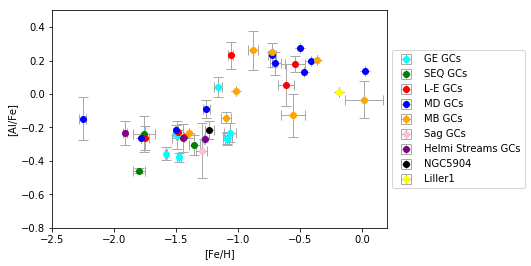

In [146]:
mask1 = (fe_h>-10)&(al_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
al_fe1 = al_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(al_fe1[np.where(gc_name1=='NGC6809')]),np.mean(al_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6121')]),np.mean(al_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6544')]),np.mean(al_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(al_fe1[np.where(gc_name1=='NGC6809')]),np.std(al_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(al_fe1[np.where(gc_name1=='NGC6121')]),np.std(al_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(al_fe1[np.where(gc_name1=='NGC6544')]),np.std(al_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(al_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(al_fe1[np.where(gc_name1=='NGC362')]),np.mean(al_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC1904')]),np.mean(al_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC4147')]),np.mean(al_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6341')]),np.mean(al_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(al_fe1[np.where(gc_name1=='NGC6205')]),np.mean(al_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(al_fe1[np.where(gc_name1=='NGC362')]),np.std(al_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(al_fe1[np.where(gc_name1=='NGC1904')]),np.std(al_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(al_fe1[np.where(gc_name1=='NGC4147')]),np.std(al_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(al_fe1[np.where(gc_name1=='NGC6341')]),np.std(al_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(al_fe1[np.where(gc_name1=='NGC6205')]),np.std(al_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(al_fe1[np.where(gc_name1=='NGC5466')]),np.mean(al_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(al_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(al_fe1[np.where(gc_name1=='NGC5466')]),np.std(al_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(al_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(al_fe1[np.where(gc_name1=='NGC104')]),np.mean(al_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6218')]),np.mean(al_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6397')]),np.mean(al_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6656')]),np.mean(al_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(al_fe1[np.where(gc_name1=='Pal10')]),np.mean(al_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(al_fe1[np.where(gc_name1=='NGC6760')]),np.mean(al_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(al_fe1[np.where(gc_name1=='NGC104')]),np.std(al_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(al_fe1[np.where(gc_name1=='NGC6218')]),np.std(al_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(al_fe1[np.where(gc_name1=='NGC6397')]),np.std(al_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(al_fe1[np.where(gc_name1=='NGC6656')]),np.std(al_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(al_fe1[np.where(gc_name1=='Pal10')]),np.std(al_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(al_fe1[np.where(gc_name1=='NGC6760')]),np.std(al_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(al_fe1[np.where(gc_name1=='Terzan4')]),np.mean(al_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(al_fe1[np.where(gc_name1=='HP1')]),np.mean(al_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6388')]),np.mean(al_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(al_fe1[np.where(gc_name1=='NGC6522')]),np.mean(al_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(al_fe1[np.where(gc_name1=='NGC6723')]),np.mean(al_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(al_fe1[np.where(gc_name1=='NGC6540')]),np.mean(al_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(al_fe1[np.where(gc_name1=='Terzan4')]),np.std(al_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(al_fe1[np.where(gc_name1=='HP1')]),np.std(al_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(al_fe1[np.where(gc_name1=='NGC6388')]),np.std(al_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(al_fe1[np.where(gc_name1=='NGC6522')]),np.std(al_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(al_fe1[np.where(gc_name1=='NGC6723')]),np.std(al_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(al_fe1[np.where(gc_name1=='NGC6540')]),np.std(al_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(al_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(al_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(al_fe1[np.where(gc_name1=='NGC4590')]),np.mean(al_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(al_fe1[np.where(gc_name1=='NGC5024')]),np.mean(al_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(al_fe1[np.where(gc_name1=='NGC5272')]),np.mean(al_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(al_fe1[np.where(gc_name1=='NGC4590')]),np.std(al_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(al_fe1[np.where(gc_name1=='NGC5024')]),np.std(al_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(al_fe1[np.where(gc_name1=='NGC5272')]),np.std(al_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(al_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(al_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(al_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(al_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[Al/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.8,.5)
plt.show()

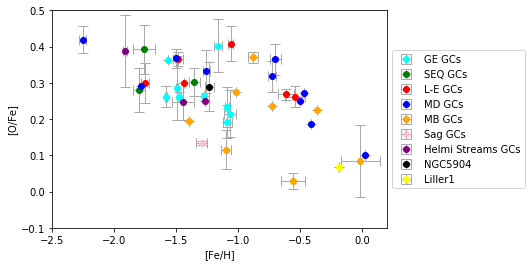

In [150]:
mask1 = (fe_h>-10)&(o_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
o_fe1 = o_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(o_fe1[np.where(gc_name1=='NGC6809')]),np.mean(o_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(o_fe1[np.where(gc_name1=='NGC6121')]),np.mean(o_fe1[np.where(gc_name1=='NGC6441')]),\
     np.mean(o_fe1[np.where(gc_name1=='NGC6544')]),np.mean(o_fe1[np.where(gc_name1=='Pal6')]),\
     np.mean(o_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(o_fe1[np.where(gc_name1=='NGC6809')]),np.std(o_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(o_fe1[np.where(gc_name1=='NGC6121')]),np.std(o_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(o_fe1[np.where(gc_name1=='NGC6544')]),np.std(o_fe1[np.where(gc_name1=='Pal6')]),\
        np.std(o_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(o_fe1[np.where(gc_name1=='NGC362')]),np.mean(o_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(o_fe1[np.where(gc_name1=='NGC1904')]),np.mean(o_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(o_fe1[np.where(gc_name1=='NGC4147')]),np.mean(o_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(o_fe1[np.where(gc_name1=='NGC6341')]),np.mean(o_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(o_fe1[np.where(gc_name1=='NGC6205')]),np.mean(o_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(o_fe1[np.where(gc_name1=='NGC362')]),np.std(o_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(o_fe1[np.where(gc_name1=='NGC1904')]),np.std(o_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(o_fe1[np.where(gc_name1=='NGC4147')]),np.std(o_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(o_fe1[np.where(gc_name1=='NGC6341')]),np.std(o_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(o_fe1[np.where(gc_name1=='NGC6205')]),np.std(o_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(o_fe1[np.where(gc_name1=='NGC5466')]),np.mean(o_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(o_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(o_fe1[np.where(gc_name1=='NGC5466')]),np.std(o_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(o_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
    np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(o_fe1[np.where(gc_name1=='NGC104')]),np.mean(o_fe1[np.where(gc_name1=='NGC6352')]),\
     np.mean(o_fe1[np.where(gc_name1=='NGC6218')]),np.mean(o_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(o_fe1[np.where(gc_name1=='NGC6397')]),np.mean(o_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(o_fe1[np.where(gc_name1=='NGC6656')]),np.mean(o_fe1[np.where(gc_name1=='NGC6752')]),\
     np.mean(o_fe1[np.where(gc_name1=='Pal10')]),np.mean(o_fe1[np.where(gc_name1=='IC1276')]),\
        np.mean(o_fe1[np.where(gc_name1=='NGC6760')]),np.mean(o_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6352')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(o_fe1[np.where(gc_name1=='NGC104')]),np.std(o_fe1[np.where(gc_name1=='NGC6352')]),\
     np.std(o_fe1[np.where(gc_name1=='NGC6218')]),np.std(o_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(o_fe1[np.where(gc_name1=='NGC6397')]),np.std(o_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(o_fe1[np.where(gc_name1=='NGC6656')]),np.std(o_fe1[np.where(gc_name1=='NGC6752')]),\
        np.std(o_fe1[np.where(gc_name1=='Pal10')]),np.std(o_fe1[np.where(gc_name1=='IC1276')]),\
           np.std(o_fe1[np.where(gc_name1=='NGC6760')]),np.std(o_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6642')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(o_fe1[np.where(gc_name1=='Terzan4')]),np.mean(o_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(o_fe1[np.where(gc_name1=='HP1')]),np.mean(o_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(o_fe1[np.where(gc_name1=='NGC6388')]),np.mean(o_fe1[np.where(gc_name1=='Terzan9')]),\
     np.mean(o_fe1[np.where(gc_name1=='NGC6522')]),np.mean(o_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(o_fe1[np.where(gc_name1=='NGC6723')]),np.mean(o_fe1[np.where(gc_name1=='NGC6642')]),\
        np.mean(o_fe1[np.where(gc_name1=='NGC6540')]),np.mean(o_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6642')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(o_fe1[np.where(gc_name1=='Terzan4')]),np.std(o_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(o_fe1[np.where(gc_name1=='HP1')]),np.std(o_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(o_fe1[np.where(gc_name1=='NGC6388')]),np.std(o_fe1[np.where(gc_name1=='Terzan9')]),\
        np.std(o_fe1[np.where(gc_name1=='NGC6522')]),np.std(o_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(o_fe1[np.where(gc_name1=='NGC6723')]),np.std(o_fe1[np.where(gc_name1=='NGC6642')]),\
           np.std(o_fe1[np.where(gc_name1=='NGC6540')]),np.std(o_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(o_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(o_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(o_fe1[np.where(gc_name1=='NGC4590')]),np.mean(o_fe1[np.where(gc_name1=='Rup106')]),\
       np.mean(o_fe1[np.where(gc_name1=='NGC5024')]),np.mean(o_fe1[np.where(gc_name1=='NGC5053')]),\
       np.mean(o_fe1[np.where(gc_name1=='NGC5272')]),np.mean(o_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(o_fe1[np.where(gc_name1=='NGC4590')]),np.std(o_fe1[np.where(gc_name1=='Rup106')]),\
          np.std(o_fe1[np.where(gc_name1=='NGC5024')]),np.std(o_fe1[np.where(gc_name1=='NGC5053')]),\
          np.std(o_fe1[np.where(gc_name1=='NGC5272')]),np.std(o_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(o_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(o_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(o_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(o_fe1[np.where(gc_name1=='Liller1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Liller1')
plt.ylabel('[O/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.1,.5)
plt.show()

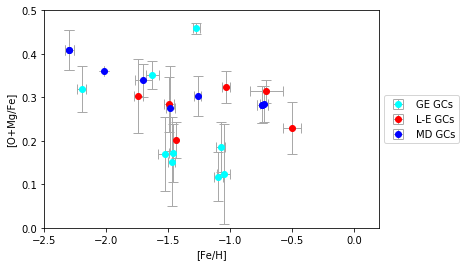

In [203]:
mask1 = (fe_h>-10)&(o_fe>-10)&(mg_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
o_fe1= o_fe[mask1]
mg_fe1 = mg_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6809')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6254')]),\
     np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6121')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6441')]),\
     np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6544')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal6')]),\
     np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6809')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6254')]),\
     np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6121')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6441')]),\
        np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6544')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal6')]),\
        np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC362')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC1851')]),\
     np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC1904')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC2808')]),\
     np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC4147')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC288')]),\
     np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6341')]),\
    np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6205')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC362')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC1851')]),\
     np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC1904')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC2808')]),\
    np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC4147')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC288')]),\
      np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6341')]),\
           np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6205')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5466')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC3201')]),\
         np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5466')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC3201')]),\
            np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6366')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')])]
ys_md = [np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC104')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6366')]),\
     np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6218')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6838')]),
     np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6397')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC7078')]),
     np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6656')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6752')]),\
        np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6838')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC7078')])]
xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6366')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6838')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')])]
yerrs_md = [np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC104')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6366')]),\
     np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6218')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6838')]),\
        np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6397')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC7078')]),\
        np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6656')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6752')]),\
           np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6838')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC7078')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]
ys_mb = [np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan4')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6171')]),\
     np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='HP1')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6380')]),
     np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6388')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan9')]),
     np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6522')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6539')]),\
        np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6540')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6553')])]
xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]
yerrs_mb = [np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan4')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6171')]),\
     np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='HP1')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6380')]),\
        np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6388')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan9')]),\
        np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6522')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6539')]),\
           np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6540')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC4590')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='Rup106')]),\
       np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5024')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5053')]),\
       np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5272')]),np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC4590')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='Rup106')]),\
          np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5024')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5053')]),\
          np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5272')]),np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(((o_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5904')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
# plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
# plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='MB GCs')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
# plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Helmi Streams GCs')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='NGC5904')
plt.ylabel('[O+Mg/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(0.,.5)
plt.show()

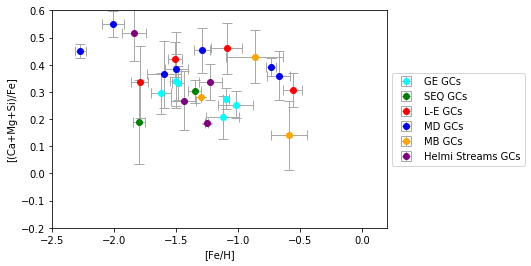

In [37]:
mask1 = (fe_h>-10)&(ca_fe>-10)&(mg_fe>-10)&(si_fe>-10)
fe_h1 = fe_h[mask1]
(ca_fe1) = ca_fe[mask1]
(mg_fe1) = mg_fe[mask1]
(si_fe1) = si_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6809')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6254')]),\
     np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6121')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6441')]),
     np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6544')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='Pal6')]),
     np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6809')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6254')]),\
     np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6121')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6441')]),\
        np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6544')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='Pal6')]),\
        np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC362')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC1851')]),\
     np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC1904')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC2808')]),
     np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC4147')]),
     np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6341')]),\
        np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6205')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC362')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC1851')]),\
     np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC1904')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC2808')]),\
    np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC4147')]),\
      np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6341')]),\
           np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6205')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')])]
ys_seq = [np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5466')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC3201')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')])]
yerrs_seq = [np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5466')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC3201')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6366')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')]),
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='Pal10')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')])]
ys_md = [np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC104')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6366')]),\
     np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6218')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='Terzan12')]),
     np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6397')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='Pal10')]),
     np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6656')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6752')]),\
        np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6838')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC7078')])]
xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6366')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='Pal10')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6838')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')])]
yerrs_md = [np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC104')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6366')]),\
     np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6218')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='Terzan12')]),\
        np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6397')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='Pal10')]),\
        np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6656')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6752')]),\
           np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6838')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC7078')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]
ys_mb = [np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='Terzan4')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6171')]),\
     np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='HP1')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6380')]),
     np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6388')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='Terzan9')]),
     np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6522')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6539')]),\
        np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6540')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6553')])]
xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]
yerrs_mb = [np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='Terzan4')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6171')]),\
     np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='HP1')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6380')]),\
        np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6388')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='Terzan9')]),\
        np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6522')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6539')]),\
           np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6540')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_h = [np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC4590')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='Rup106')]),\
       np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5024')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5053')]),\
       np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5272')]),np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='Pal5')]),\
       np.mean(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5904')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_h = [np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC4590')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='Rup106')]),\
          np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5024')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5053')]),\
          np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5272')]),np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='Pal5')]),\
          np.std(((si_fe1+mg_fe1+ca_fe1)/2)[np.where(gc_name1=='NGC5904')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.ylabel('[(Ca+Mg+Si)/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.2,.6)
plt.show()

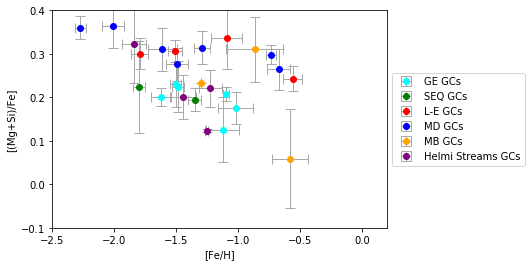

In [38]:
mask1 = (fe_h>-10)&(mg_fe>-10)&(si_fe>-10)
fe_h1 = fe_h[mask1]
(ca_fe1) = ca_fe[mask1]
(mg_fe1) = mg_fe[mask1]
(si_fe1) = si_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6809')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6254')]),\
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6121')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6441')]),
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6544')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal6')]),
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6809')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6254')]),\
     np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6121')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6441')]),\
        np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6544')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal6')]),\
        np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),
    np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC362')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC1851')]),\
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC1904')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC2808')]),
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC4147')]),
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6341')]),\
        np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6205')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC4147')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC362')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC1851')]),\
     np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC1904')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC2808')]),\
    np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC4147')]),\
      np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6341')]),\
           np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6205')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')])]
ys_seq = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5466')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC3201')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')])]
yerrs_seq = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5466')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC3201')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6366')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')]),
     np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),np.mean(fe_h1[np.where(gc_name1=='Pal10')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')])]
ys_md = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC104')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6366')]),\
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6218')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan12')]),
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6397')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal10')]),
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6656')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6752')]),\
        np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6838')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC7078')])]
xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6366')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6397')]),np.std(fe_h1[np.where(gc_name1=='Pal10')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6838')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')])]
yerrs_md = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC104')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6366')]),\
     np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6218')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan12')]),\
        np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6397')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal10')]),\
        np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6656')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6752')]),\
           np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6838')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC7078')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]
ys_mb = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan4')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6171')]),\
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='HP1')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6380')]),
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6388')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan9')]),
     np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6522')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6539')]),\
        np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6540')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6553')])]
xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]
yerrs_mb = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan4')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6171')]),\
     np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='HP1')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6380')]),\
        np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6388')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Terzan9')]),\
        np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6522')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6539')]),\
           np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6540')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_h = [np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC4590')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Rup106')]),\
       np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5024')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5053')]),\
       np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5272')]),np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal5')]),\
       np.mean(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5904')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_h = [np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC4590')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Rup106')]),\
          np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5024')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5053')]),\
          np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5272')]),np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='Pal5')]),\
          np.std(((si_fe1+mg_fe1)/2)[np.where(gc_name1=='NGC5904')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MD GCs')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='MB GCs')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.ylabel('[(Mg+Si)/Fe]')
plt.xlabel('[Fe/H]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-2.5,0.2)
plt.ylim(-.1,.4)
plt.show()